In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Cargar Dataset

In [3]:

# Set the path to the file you'd like to load
# Download latest version
path = "train.csv"

df = pd.read_csv(path)

print("First 5 records:", df.head())

First 5 records:                  objID  run  camcol  field    type      rowv      colv  \
0  1237646791699727334  307       1    170    star  0.003050 -0.022903   
1  1237646797595610001  308       4     22  galaxy  0.010320  0.002395   
2  1237648705132823367  752       5    554  galaxy -0.004909 -0.008557   
3  1237646382079477246  211       6    357    star  0.001676 -0.002634   
4  1237646588250424751  259       6    548    star -0.032870  0.017114   

          u         g         r         i         z  psfMag_u  psfMag_g  \
0  24.61602  22.27828  21.09076  20.37351  19.82352  24.53536  22.27835   
1  25.77781  24.34480  22.17616  21.35162  21.97618  25.80193  24.25712   
2  23.31927  22.80799  21.51392  20.90690  20.80234  23.18578  23.19295   
3  20.31570  18.04348  16.93458  16.42767  16.08795  20.31249  18.04254   
4  23.97331  23.76811  22.12636  20.97157  20.28971  24.20139  23.88304   

   psfMag_r  psfMag_i  psfMag_z  modelFlux_u  modelFlux_g  modelFlux_r  \
0  21.10538  

# El objetivo principal es clasificar objetos celestes (galaxias, estrellas)
Este es un problema de aprendizaje supervisado y específicamente, una tarea de clasificación

Medicion rendimiento: Accuracy, Precision, Recall, F1-score, y/o ROC AUC


---


## Pasos:


1.   Analizar caracteristicas:
    1.   Tipos de datos
    2.   Valores Faltantes
    3.   Datos duplicados
    4.  Estadisticas basicas (Calcular estadísticas descriptivas para las variables numéricas (media, mediana, desviación estándar, mínimo, máximo, cuartiles))
    5. Analisis de distribucion:
        1. Gráficos de Distribución (Histogramas)
        2. Análisis de Valores Atípicos (Outliers)
    6. Análisis de Correlación


2.   Preparación de Datos (Preprocessing)
    1.  Limpieza de Datos
        1.  Manejar Datos Faltantes
        2.  Remover Duplicados
        3.  Manejar Valores Atípicos
    2.  Selección de Características (Feature Selection)
    3. Ingeniería de Características (Feature Engineering): Crear nuevas características a partir de las existentes o transforma alguna
    4. Estandarización/Escalado de Datos
    5. División Train/Test (Revisar)

3. Selección y Entrenamiento Inicial de Modelos
    1.  Selección de Modelos
    2. Definición de Métricas de Rendimiento
    3. Entrenamiento

4. Evaluación y Comparación de Modelos Iniciales
  1. Evaluación
  2. Comparación

5. Ajuste Fino del Sistema (Fine-Tuning)
  1. Uso de Validación Cruzada (Cross-Validation)
  2. Ajuste de Hiperparámetros
  3. Prueba con Métodos de Ensamblaje (Ensemble Methods) Opcional

6. Medir el Rendimiento Final en el Conjunto de Prueba (Test Set)
7. Presentar la Solución: Preparar una presentación con gráficos y visualizaciones que expliquen cómo el modelo cumple los objetivos definidos al principio del proyecto







# Analisis de Caracteristicas
type objetivo

In [4]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   run          int64  
 2   camcol       int64  
 3   field        int64  
 4   type         object 
 5   rowv         float64
 6   colv         float64
 7   u            float64
 8   g            float64
 9   r            float64
 10  i            float64
 11  z            float64
 12  psfMag_u     float64
 13  psfMag_g     float64
 14  psfMag_r     float64
 15  psfMag_i     float64
 16  psfMag_z     float64
 17  modelFlux_u  float64
 18  modelFlux_g  float64
 19  modelFlux_r  float64
 20  modelFlux_i  float64
 21  modelFlux_z  float64
 22  petroRad_u   float64
 23  petroRad_g   float64
 24  petroRad_r   float64
 25  petroRad_i   float64
 26  petroRad_z   float64
 27  expRad_u     float64
 28  expRad_g     float64
 29  expRad_r     float64
 30  expRad_i     float64
 31  expRad_z     float64
 32

In [5]:
# Valores faltantes
df.isnull().sum()

objID          0
run            0
camcol         0
field          0
type           0
rowv           0
colv           0
u              0
g              0
r              0
i              0
z              0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
modelFlux_u    0
modelFlux_g    0
modelFlux_r    0
modelFlux_i    0
modelFlux_z    0
petroRad_u     0
petroRad_g     0
petroRad_r     0
petroRad_i     0
petroRad_z     0
expRad_u       0
expRad_g       0
expRad_r       0
expRad_i       0
expRad_z       0
q_u            0
q_g            0
q_r            0
q_i            0
q_z            0
u_u            0
u_g            0
u_r            0
u_i            0
u_z            0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
ra             0
dec            0
b              0
l              0
dtype: int64

In [6]:
df.isna().sum()

objID          0
run            0
camcol         0
field          0
type           0
rowv           0
colv           0
u              0
g              0
r              0
i              0
z              0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
modelFlux_u    0
modelFlux_g    0
modelFlux_r    0
modelFlux_i    0
modelFlux_z    0
petroRad_u     0
petroRad_g     0
petroRad_r     0
petroRad_i     0
petroRad_z     0
expRad_u       0
expRad_g       0
expRad_r       0
expRad_i       0
expRad_z       0
q_u            0
q_g            0
q_r            0
q_i            0
q_z            0
u_u            0
u_g            0
u_r            0
u_i            0
u_z            0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
ra             0
dec            0
b              0
l              0
dtype: int64

In [7]:
#datos faltantes
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#Estadísticas básicas para numericas
df.describe(include="number")

,objID,run,camcol,field,rowv,colv,u,g,r,i,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,q_u,q_g,q_r,q_i,q_z,u_u,u_g,u_r,u_i,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,1.237648e+18,5.659329e+02,3.491990e+00,3.539839e+02,-1.229906e+00,-1.229669e+00,2.326655e+01,2.196408e+01,2.075499e+01,2.026221e+01,1.993484e+01,2.331607e+01,2.217918e+01,2.103692e+01,2.051476e+01,2.013707e+01,4.850689e+00,1.935893e+01,3.801614e+01,5.012389e+01,6.645943e+01,3.595975e+00,2.660009e+00,2.153877e+00,2.268903e+00,2.464867e+00,4.273615e+00,1.006876e+00,5.685698e-01,5.741834e-01,1.221625e+00,-1.100517e+01,2.634738e+00,-4.317365e-02,-8.278062e-02,-5.412322e-02,-6.096688e+00,-4.962920e-01,3.233861e-03,-2.155812e-02,1.581106e-02,2.020452e-01,3.187758e-01,3.895273e-01,4.070051e-01,2.846370e-01,1.465570e+02,1.294996e+00,1.666282e+01,2.041597e+02
std,1.157163e+12,2.694373e+02,1.640876e+00,2.108861e+02,1.108875e+02,1.108875e+02,1.806353e+00,1.951670e+00,1.704858e+00,1.741248e+00,1.773982e+00,1.701665e+00,1.963581e+00,1.778409e+00,1.796574e+00,1.788885e+00,5.279932e+01,1.472699e+02,2.495029e+02,3.882823e+02,5.740003e+02,8.672096e+00,6.359679e+00,6.189141e+00,6.139913e+00,5.259957e+00,9.933262e+00,3.435199e+00,2.114138e+00,2.000210e+00,3.971844e+00,2.123614e+04,4.749545e+03,1.116917e+01,6.345815e+01,2.307531e+02,1.047518e+04,7.846133e+02,2.090980e+01,6.493048e+01,1.878144e+02,2.541024e-01,2.890191e-01,2.956003e-01,3.006857e-01,2.814496e-01,6.975852e+01,7.117185e+00,3.360723e+01,9.805877e+01
min,1.237646e+18,9.400000e+01,1.000000e+00,1.100000e+01,-9.999000e+03,-9.999000e+03,1.036910e+01,9.859290e+00,9.135631e+00,8.364407e+00,8.588462e+00,1.009845e+01,9.797405e+00,9.360425e+00,8.120246e+00,8.507508e+00,-5.418239e+02,-7.738445e+03,-6.002056e+01,-2.766236e+03,-2.700733e+05,5.027098e-05,1.145184e-05,1.519508e-03,4.915121e-06,1.394985e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.237508e+07,-9.305439e+04,-1.727213e+04,-8.447918e+04,-2.944563e+05,-2.082001e+07,-1.546441e+06,-1.088700e+03,-1.090781e+05,-2.253042e+05,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.052647e+00,-9.043676e+00,-6.459335e+01,1.656026e-04
25%,1.237647e+18,3.070000e+02,2.000000e+00,1.650000e+02,-4.691689e-03,-4.336495e-03,2.246006e+01,2.106500e+01,1.996472e+01,1.939146e+01,1.899236e+01,2.276329e+01,2.136565e+01,2.026023e+01,1.963975e+01,1.921553e+01,3.395509e-02,4.840835e-01,1.583576e+00,2.671750e+00,3.410678e+00,1.264846e+00,1.277374e+00,1.170163e+00,1.153408e+00,1.131841e+00,3.788431e-02,3.098091e-02,2.393320e-02,2.172199e-02,3.743826e-02,-3.300615e-01,-1.082668e-01,-9.657131e-02,-1.173684e-01,-1.847010e-01,-3.301269e-01,-6.161623e-02,-5.767423e-02,-5.832260e-02,-8.673370e-02,5.000000e-02,5.766463e-02,1.089202e-01,1.265294e-01,5.000000e-02,9.472061e+01,-5.084042e-01,-7.375052e+00,1.957083e+02
50%,1.237649e+18,7.520000e+02,4.000000e+00,3.790000e+02,0.000000e+00,0.000000e+00,2.355378e+01,2.240022e+01,2.125834e+01,2.062551e+01,2.018735e+01,2.364109e+01,2.271662e+01,2.162635e+01,2.095734e+01,2.046863e+01,3.271371e-01,1.088862e+00,3.133487e+00,5.615025e+00,8.350072e+00,2.968987e+00,1.882135e+00,1.437642e+00,1.471452e+00,1.491077e+00,6.6

In [10]:
#separar type como y
y = df["type"]
# contar categorias
y.value_counts()

type
star      2000004
galaxy    1999996
Name: count, dtype: int64

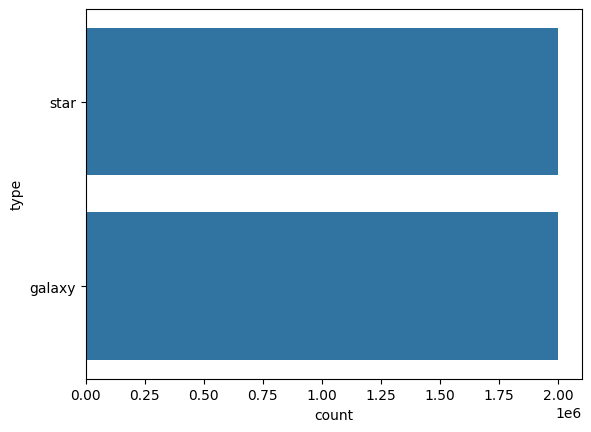

In [11]:
# Analisis de distribuciones (gráficos de barras para Y) (en millones)
sns.countplot(y=y)
plt.show()

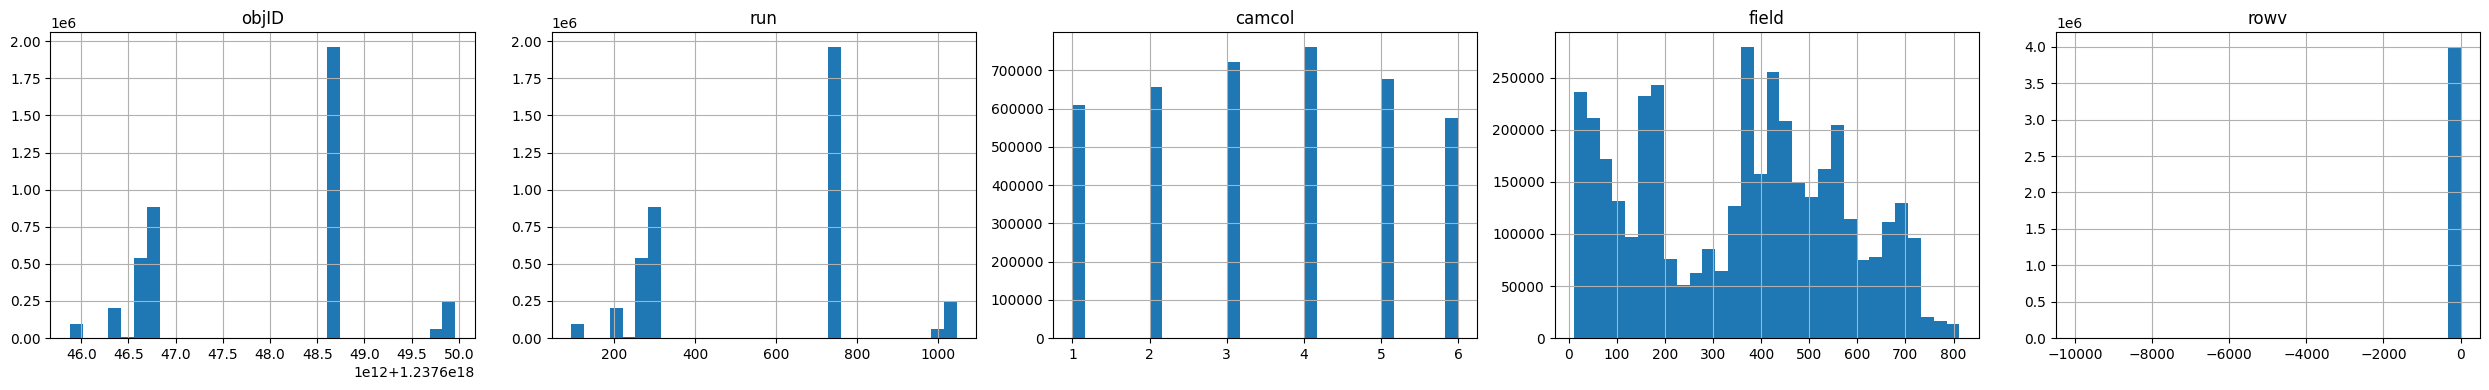

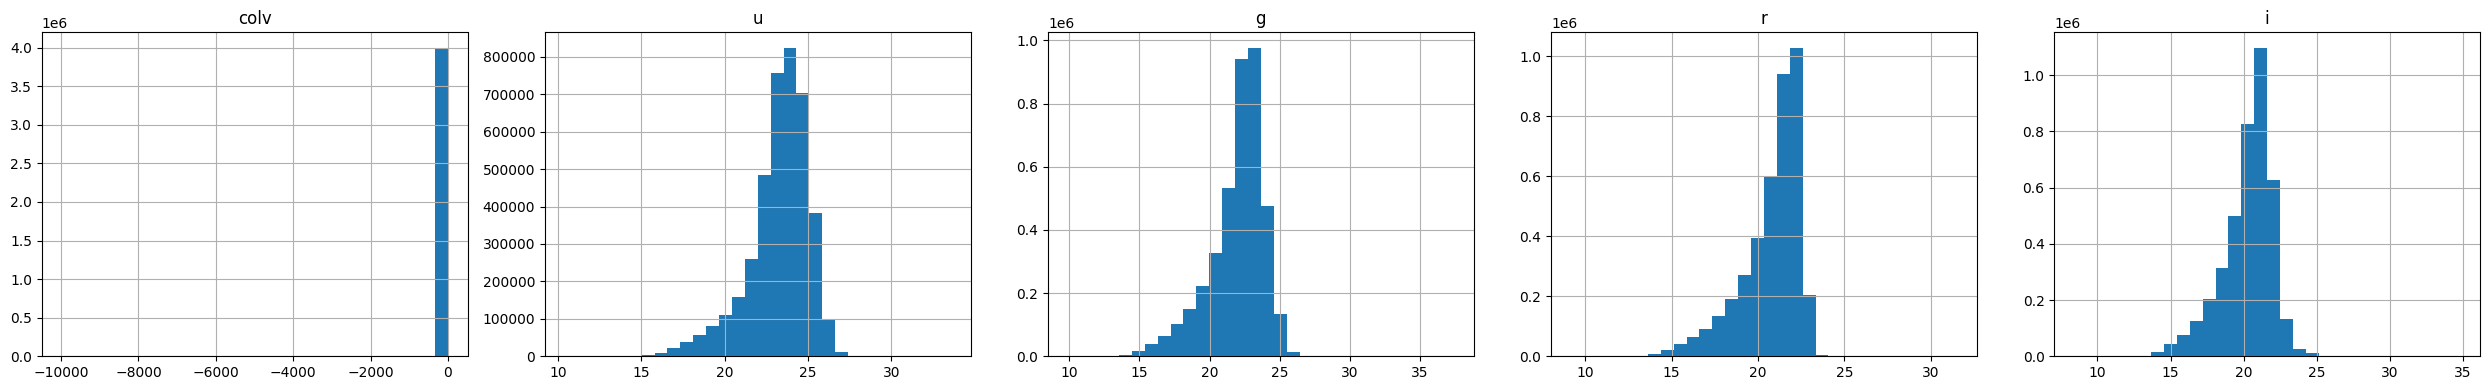

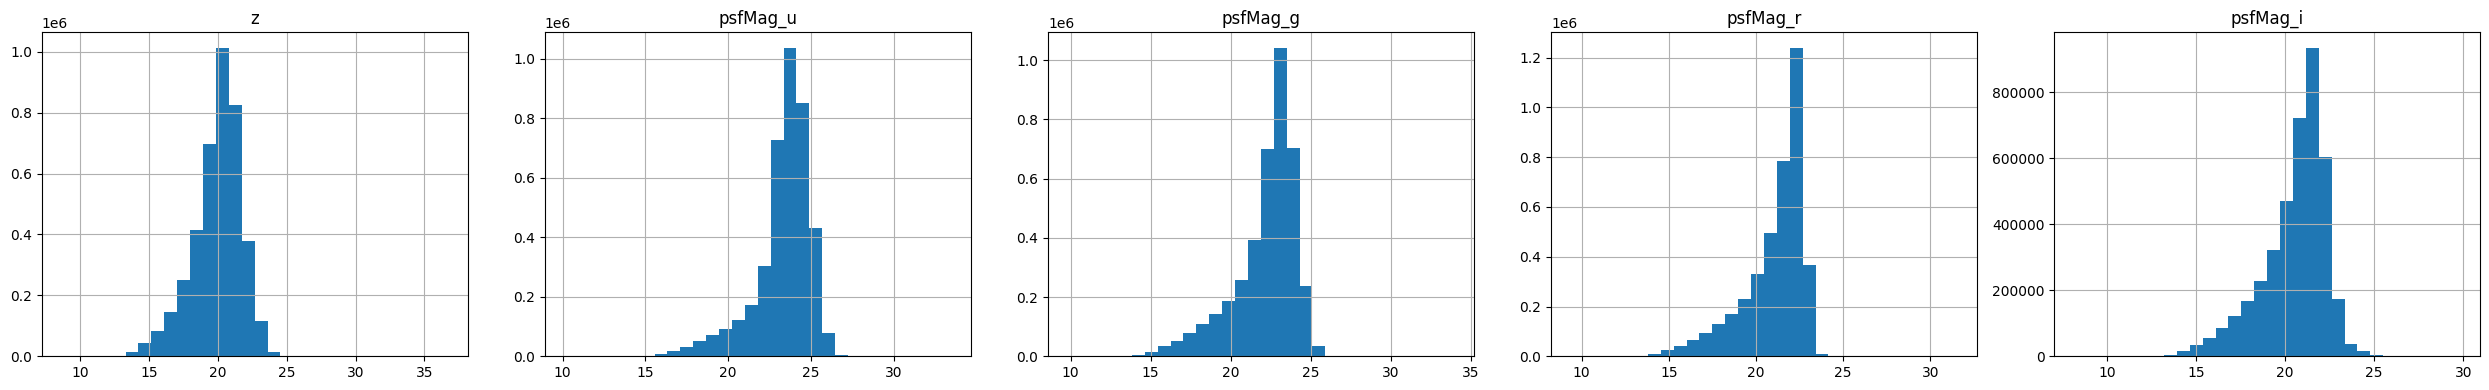

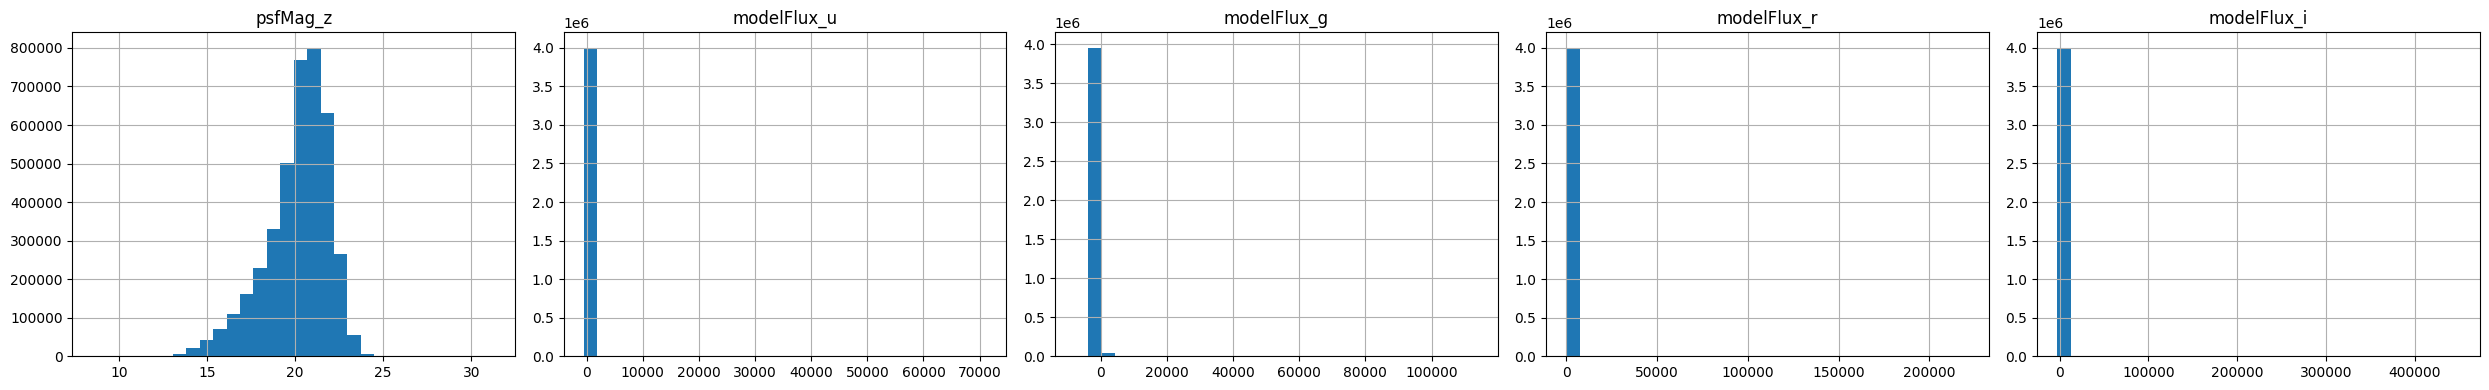

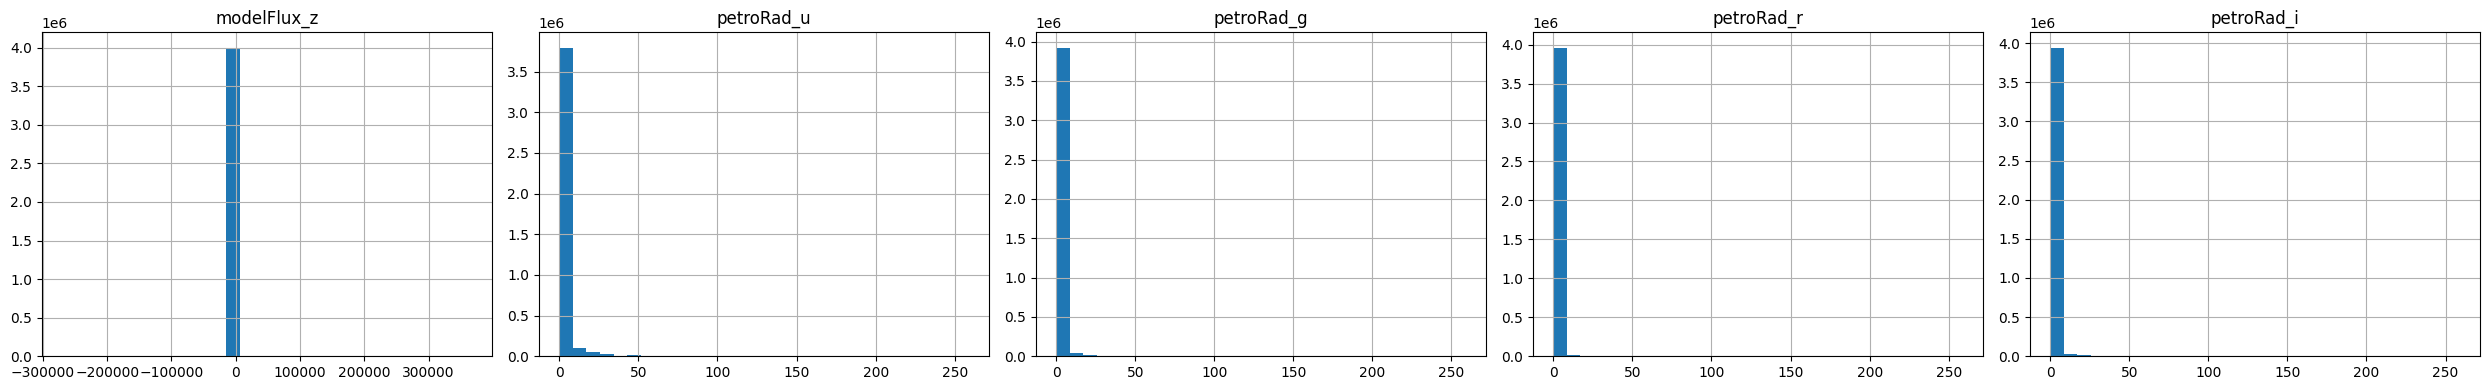

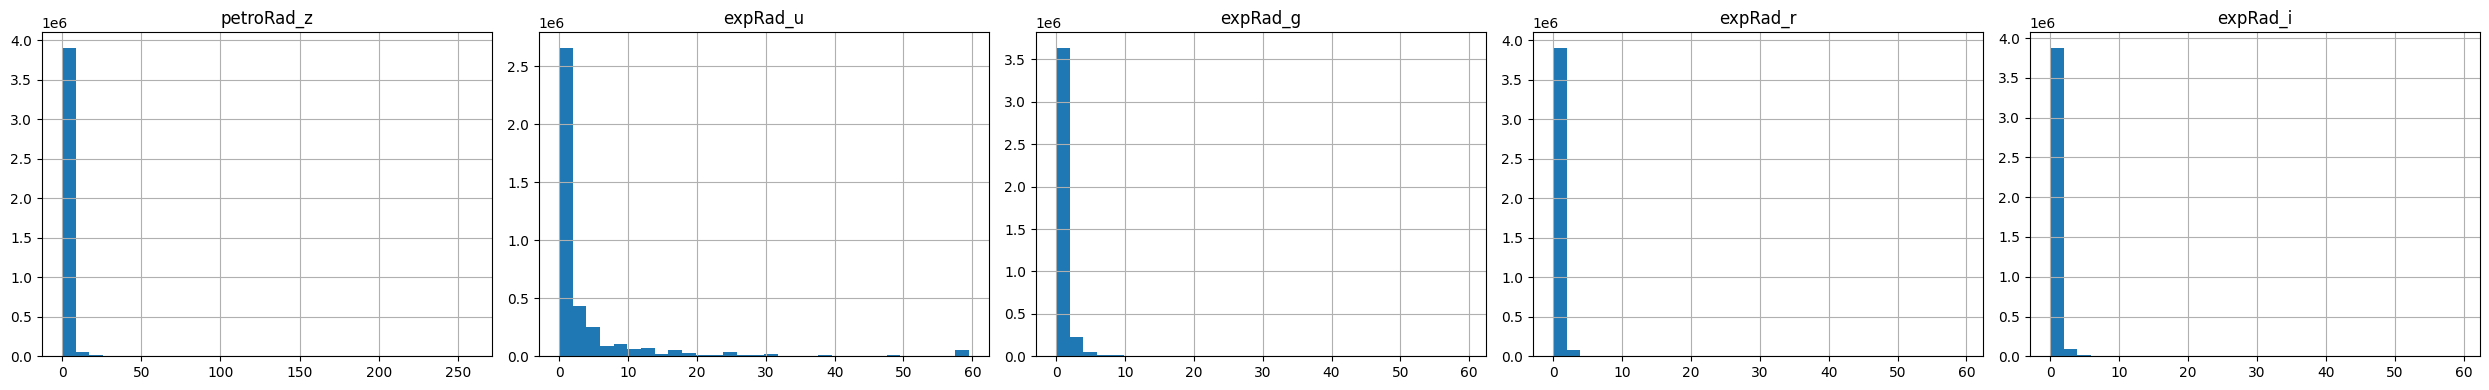

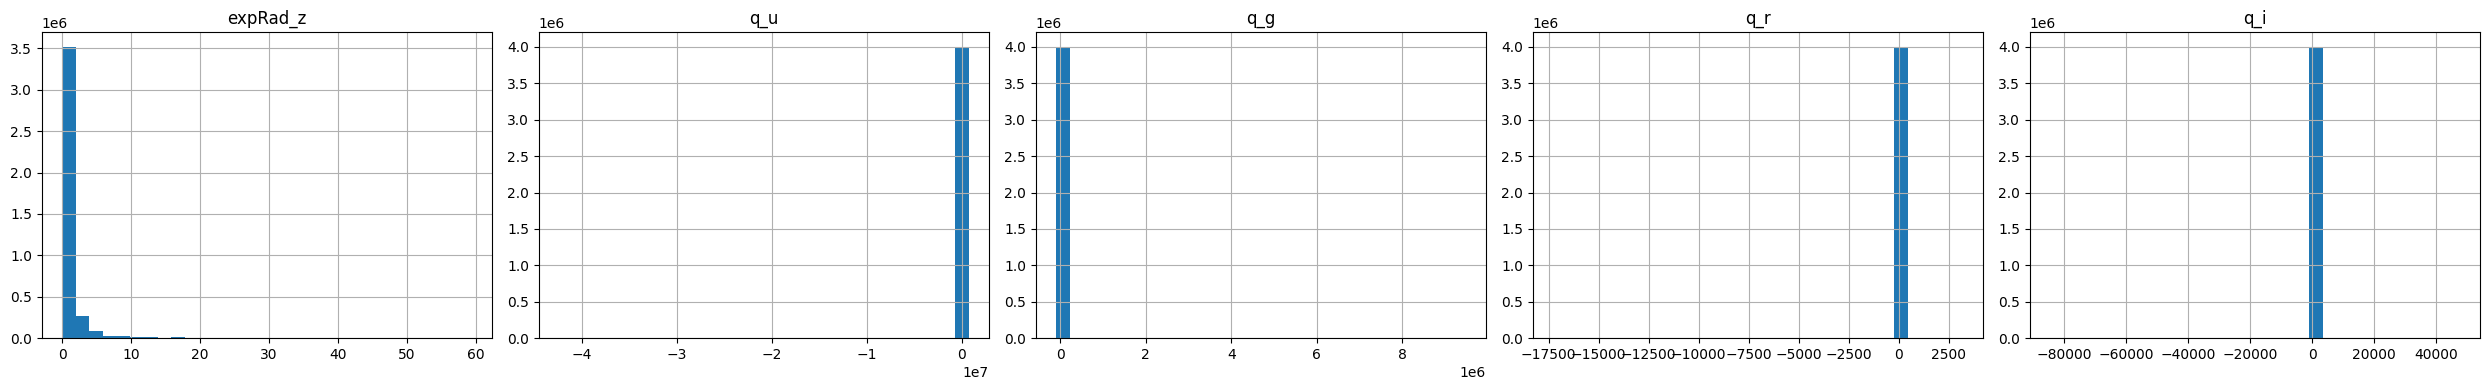

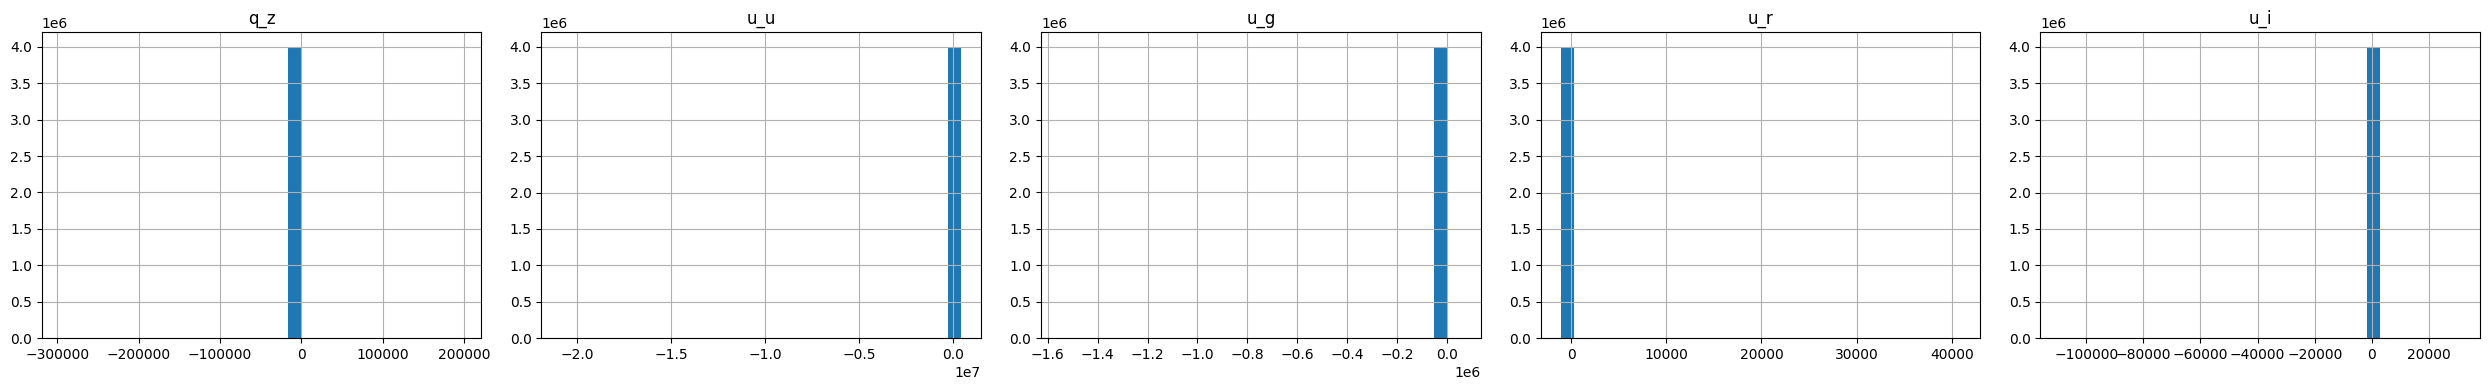

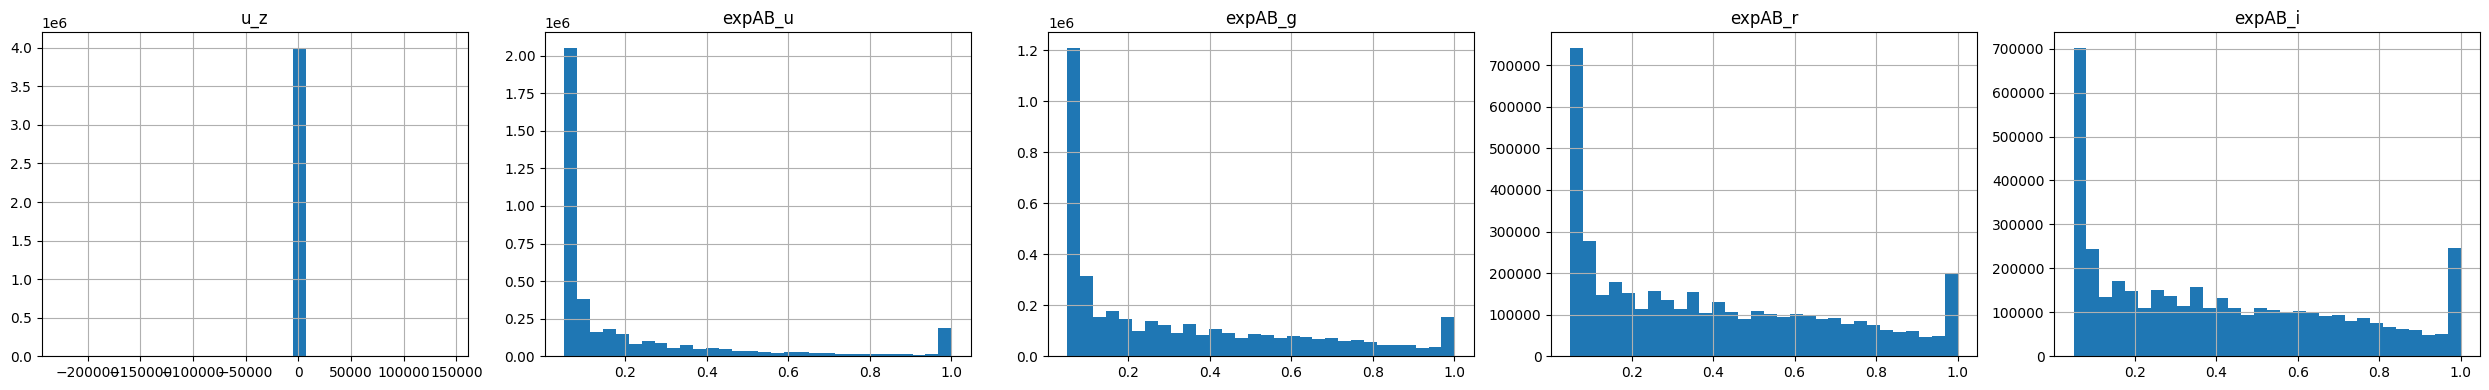

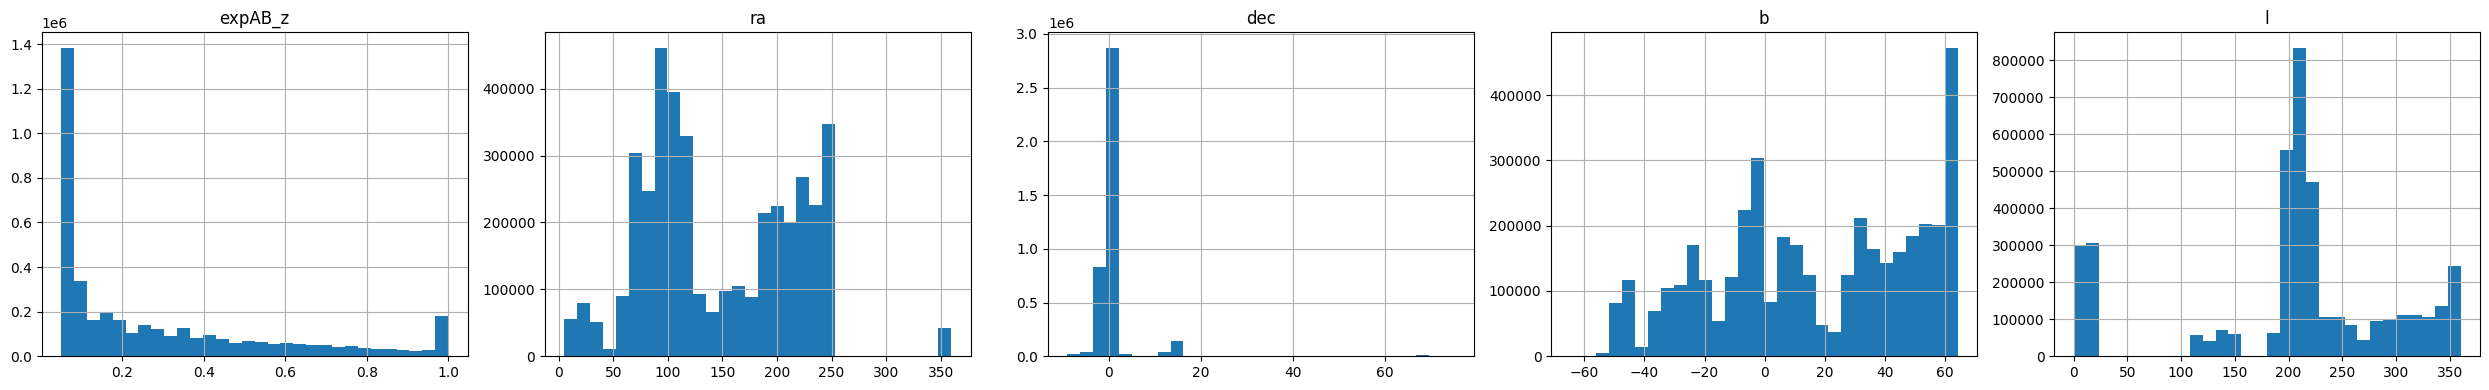

In [12]:
# Histograma de las variables numéricas

cols = [col for col in df.select_dtypes(include='number').columns if col != 'type']

# Mostrar 3 histogramas por figura
for i in range(0, len(cols), 5):
    current_cols = cols[i:i+5]
    fig, axes = plt.subplots(1, len(current_cols), figsize=(5 * len(current_cols), 4))

    if len(current_cols) == 1:
        axes = [axes]

    for j, col in enumerate(current_cols):
        df[col].dropna().hist(bins=30, ax=axes[j])
        axes[j].set_title(col)
        axes[j].grid(True)

    plt.tight_layout()
    plt.show()
    plt.close(fig)

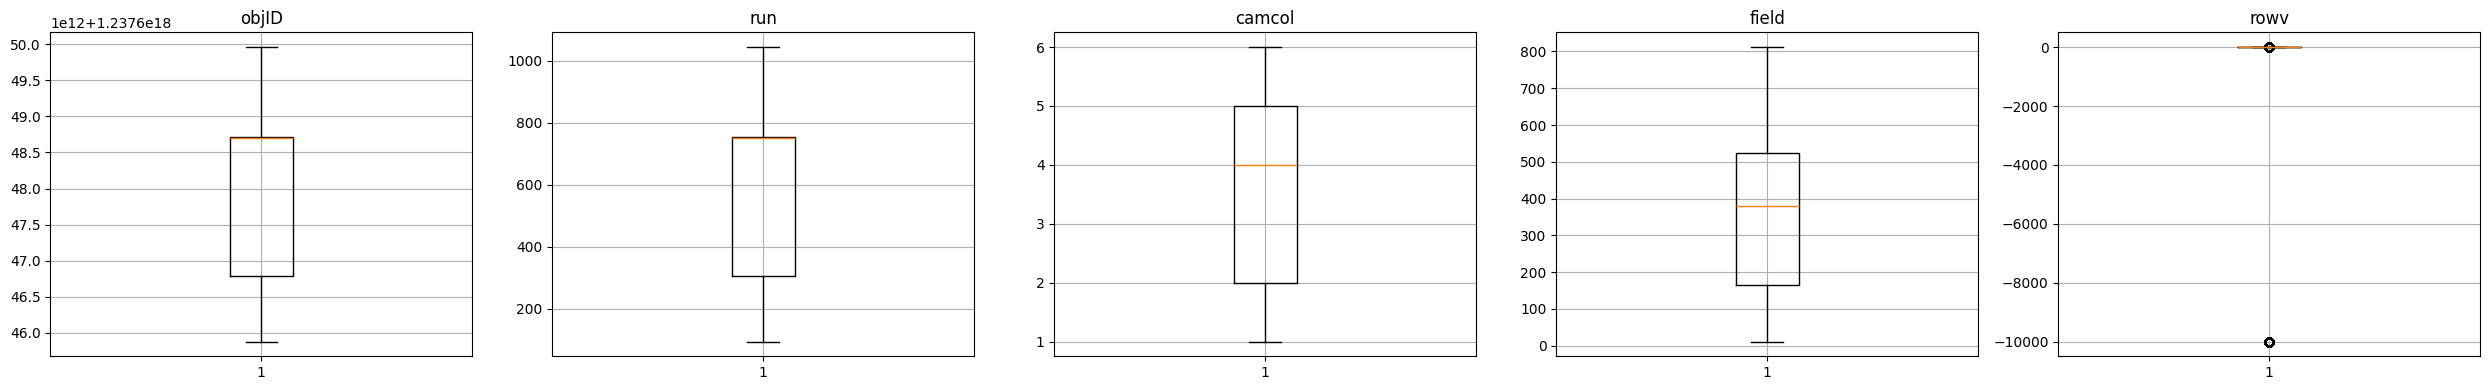

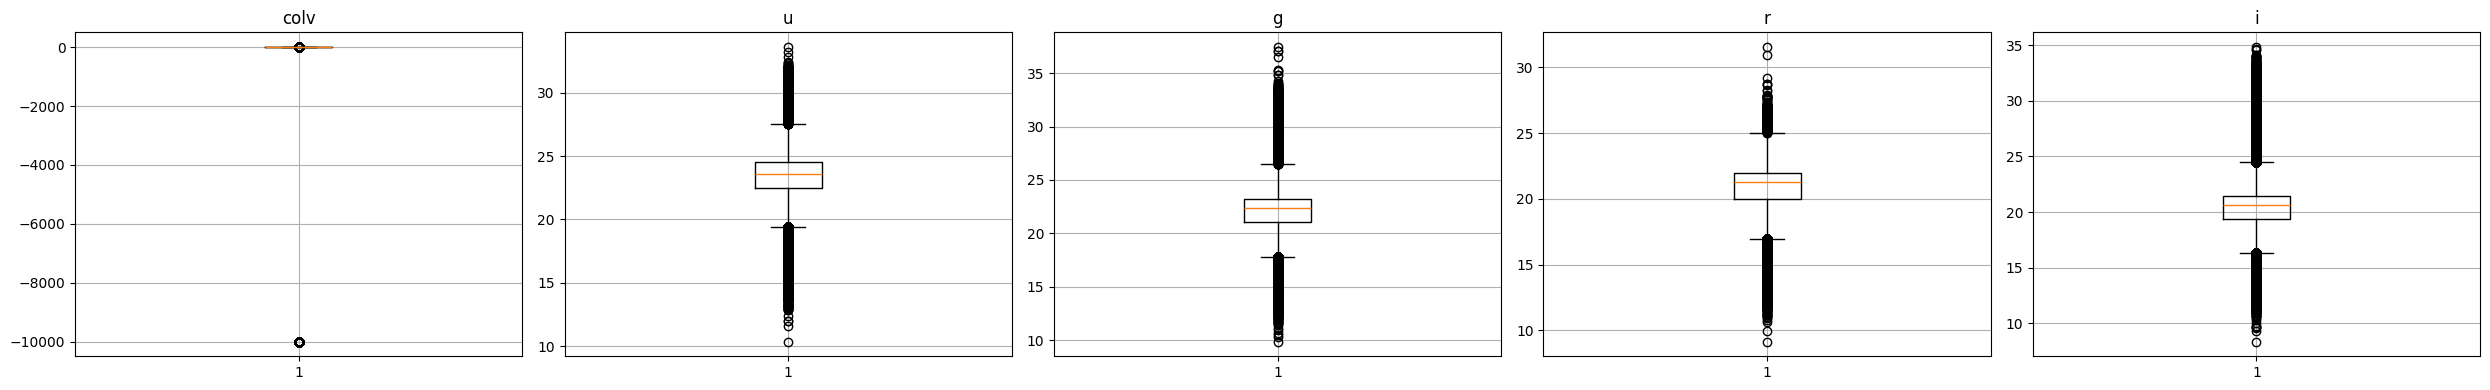

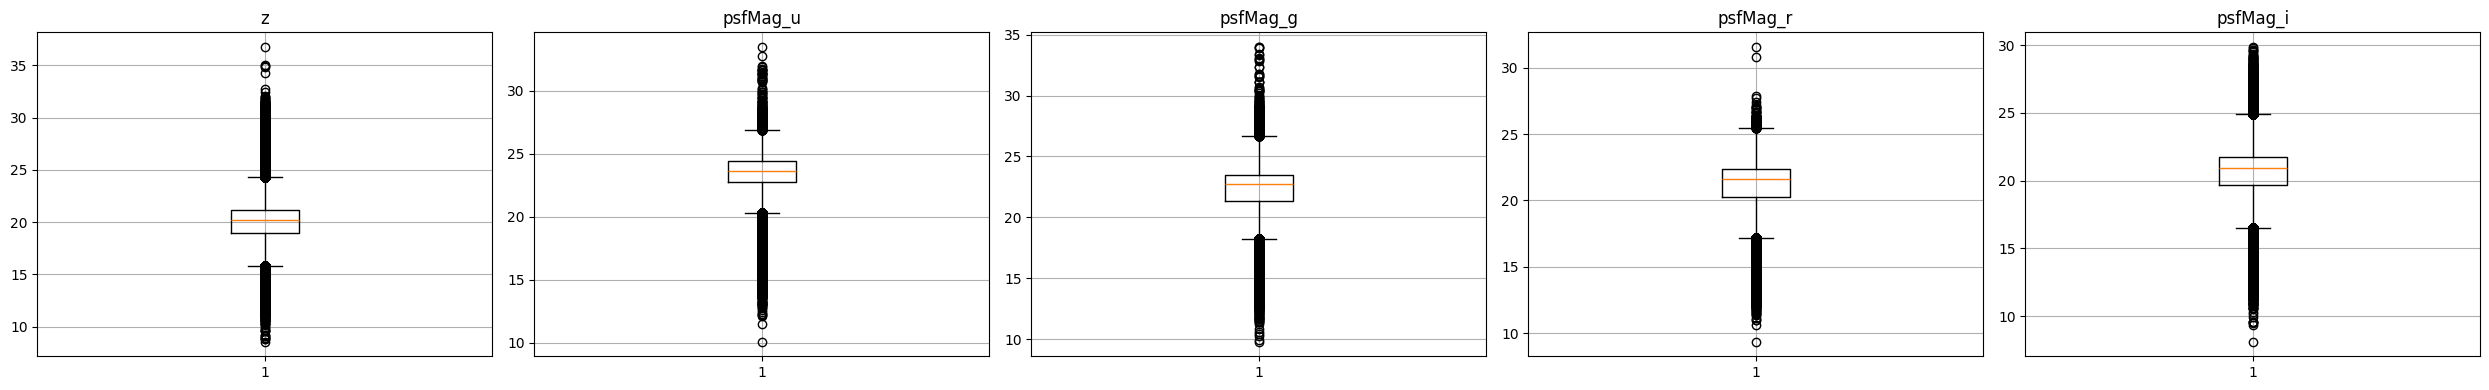

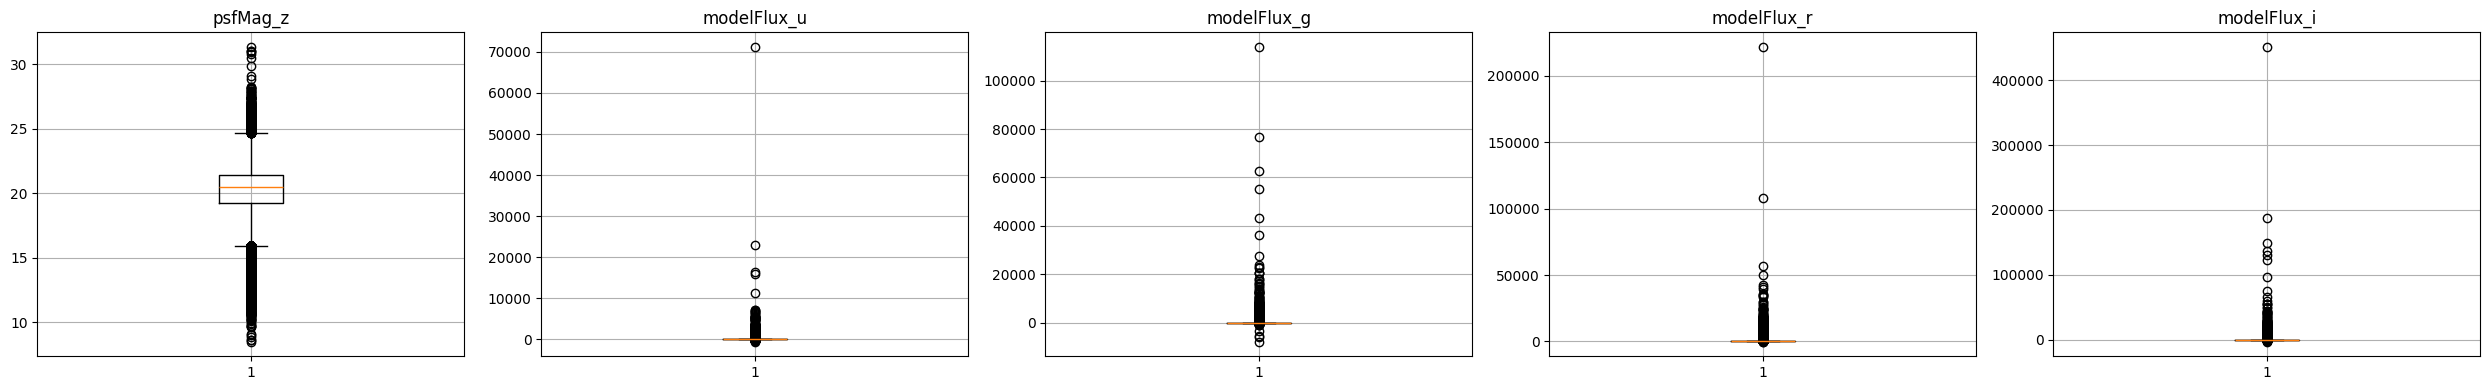

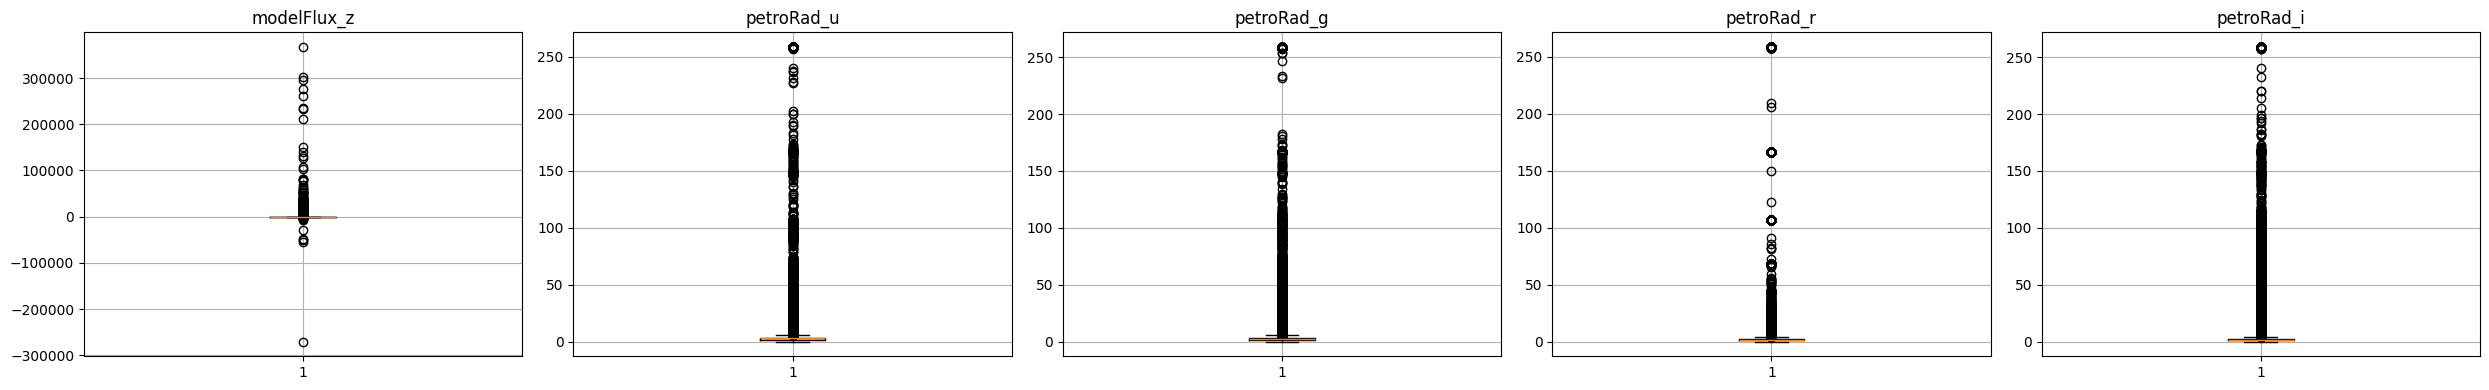

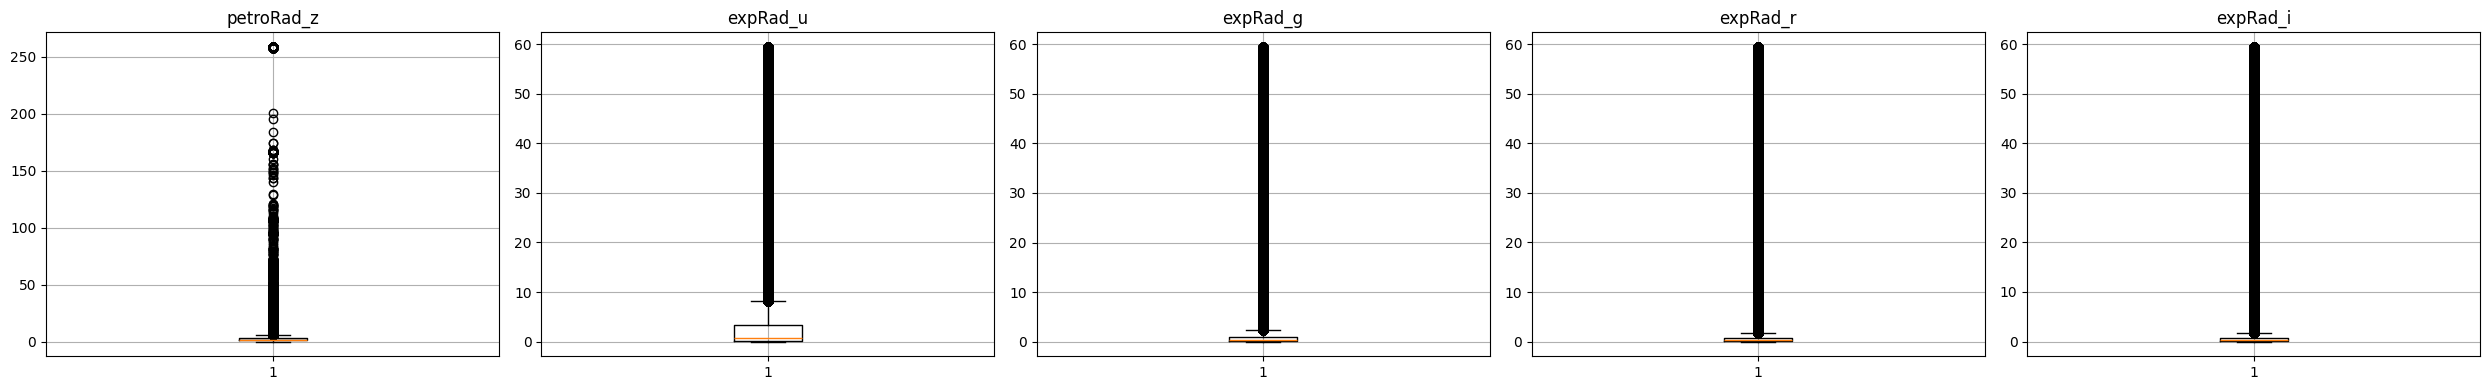

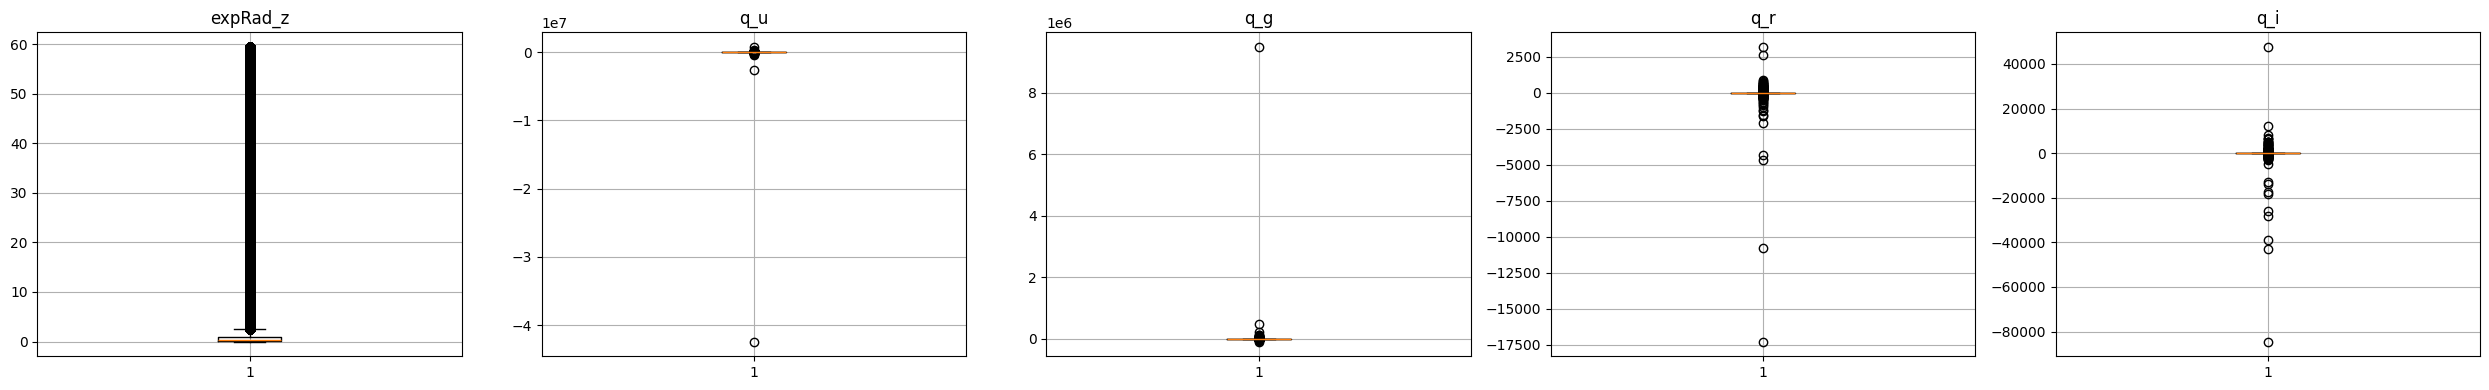

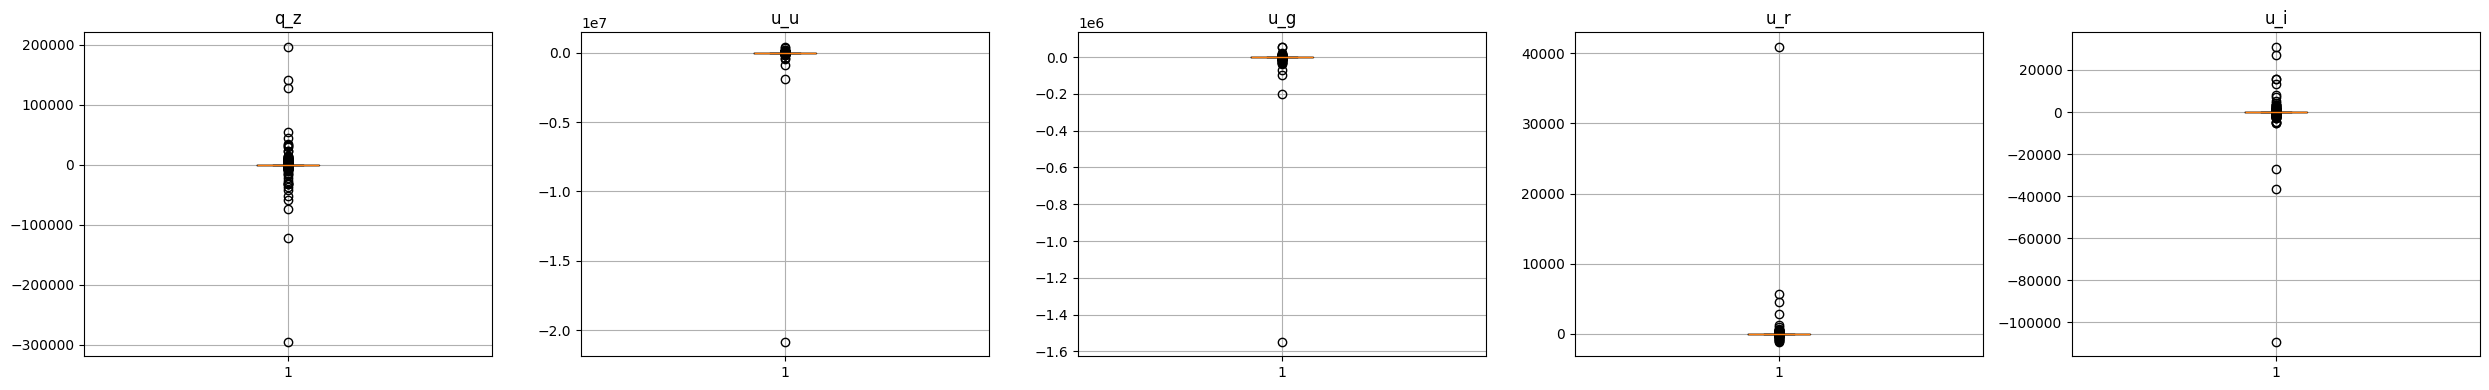

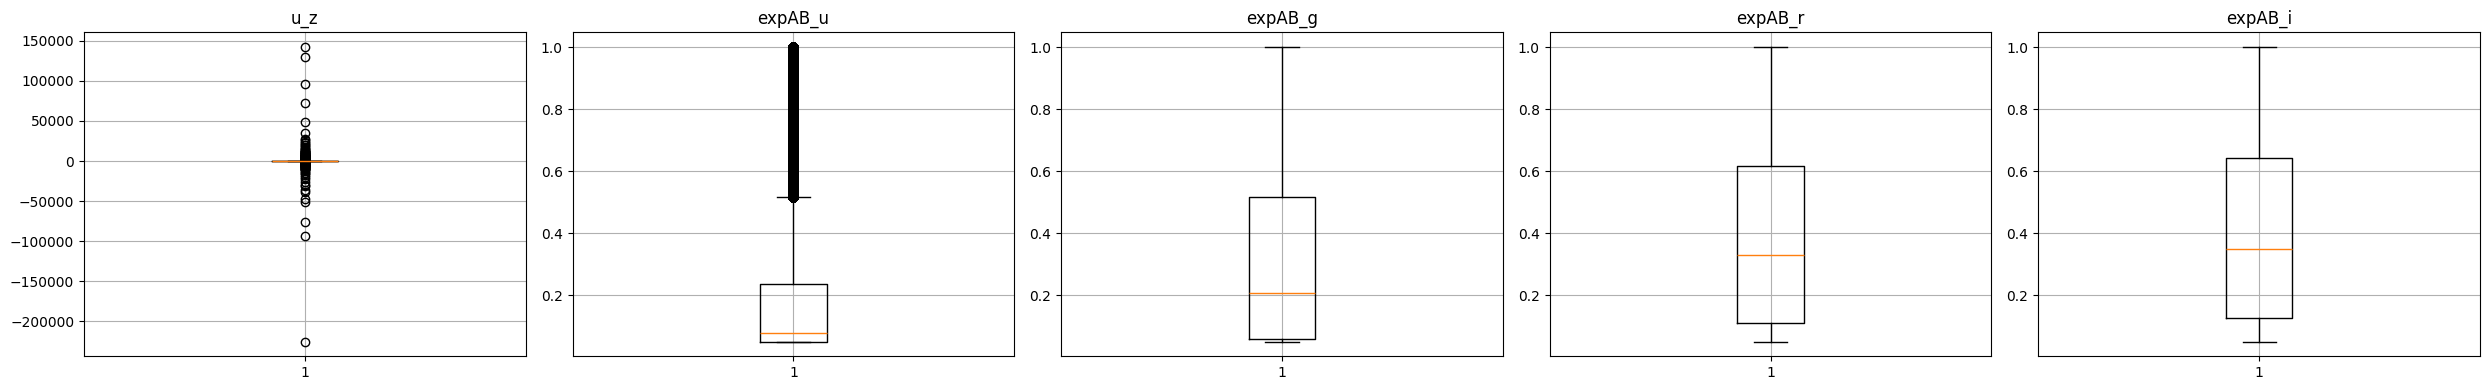

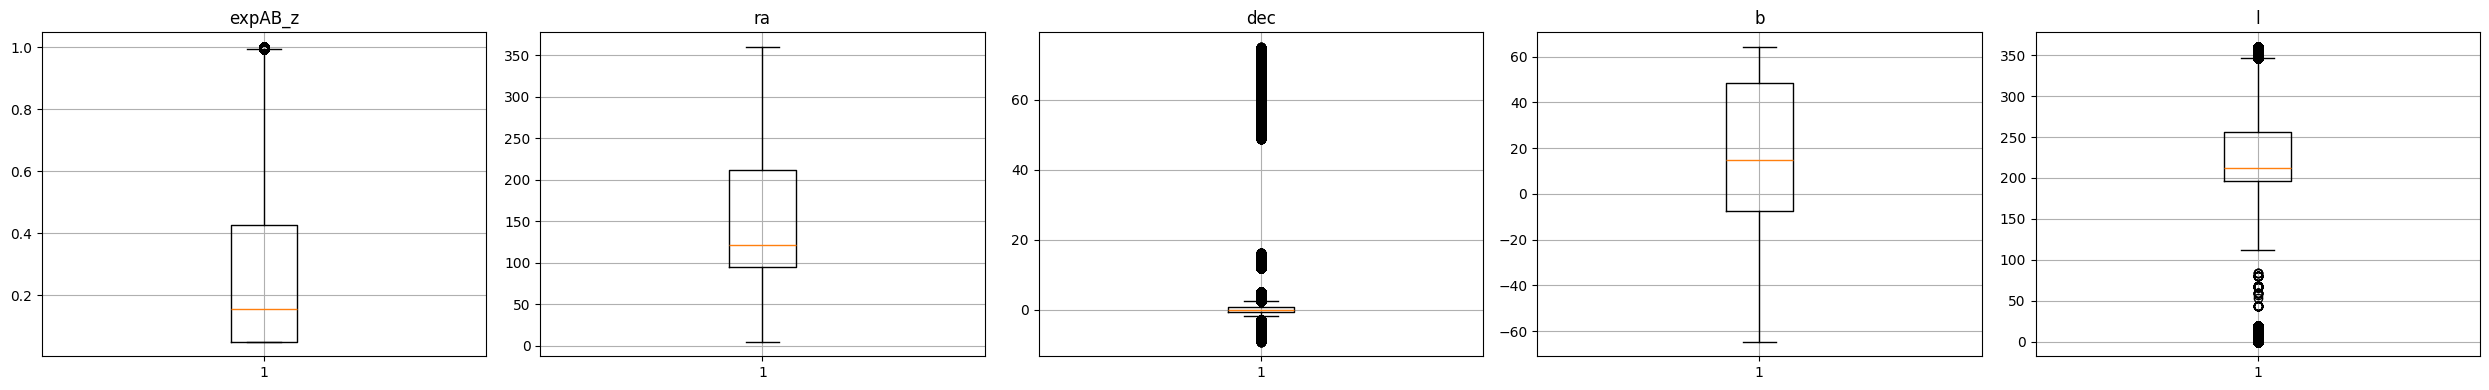

In [13]:
# Analisis de valores atipicos (Boxplots)
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas (excluyendo 'type')
cols = [col for col in df.select_dtypes(include='number').columns if col != 'type']

# Mostrar 3 boxplots por figura
for i in range(0, len(cols), 5):
    current_cols = cols[i:i+5]
    fig, axes = plt.subplots(1, len(current_cols), figsize=(5 * len(current_cols), 4))

    if len(current_cols) == 1:
        axes = [axes]

    for j, col in enumerate(current_cols):
        axes[j].boxplot(df[col].dropna(), vert=True)
        axes[j].set_title(col)
        axes[j].grid(True)

    plt.tight_layout()
    plt.show()
    plt.close(fig)


In [14]:
#Aqui falta la parte de Ejercicio.ipynb donde evaluamos si aplicar escalado de datos y tratamiento de los outliers
#rowv y colv no aportan son casi puros 0s
#q_*, u_* (Stokes parameters) → distribución con extremos extremos y casi todos los valores alrededor de 0. Altamente sesgados y con outliers exagerados, elimínalos si no estás analizando polarización.
##!! quitamos las identificadores, quitamos q_u, q_* ya que casi todos los valores estan sesgados a 0


#Las columnas:

#psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z

#u, g, r, i, z

#son magnitudes fotométricas (en magnitudes aparentes), y como viste en los boxplots:

#Tienen outliers, pero estos no son errores necesariamente.

#Los outliers representan objetos reales muy brillantes o muy débiles, lo cual es información valiosa.
#Escalar con RobustScaler en lugar de StandardScaler para reducir impacto de valores extremos





In [15]:
### Transformación Logarítmica
'''
Se identificaron múltiples variables con distribuciones altamente sesgadas a la derecha, incluyendo las magnitudes de flujo y radios fotométricos. Para mejorar la estabilidad del modelo y reducir el impacto de valores extremos (outliers), se aplicó una transformación logarítmica con `np.log1p()`.

Esto permitió:
- Normalizar parcialmente las distribuciones.
- Suavizar los valores atípicos.
- Preparar mejor los datos para algoritmos sensibles a escalas (como SVM, regresión logística y KNN).

La transformación fue aplicada a variables como: `modelFlux_*`, `petroRad_*`, `expRad_*`, `expAB_*`, entre otras.



for col in selected_columns:
    df[col] = np.log1p(df[col])
'''
selected_columns = ['modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
            'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
            'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z','expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z'
            ]


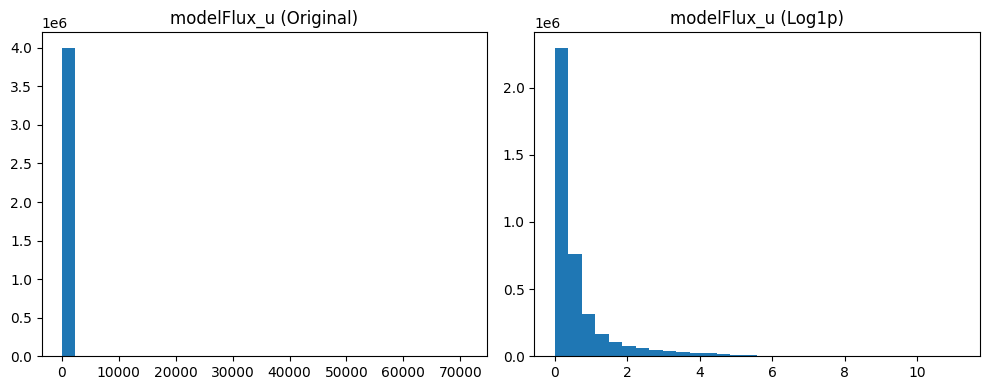

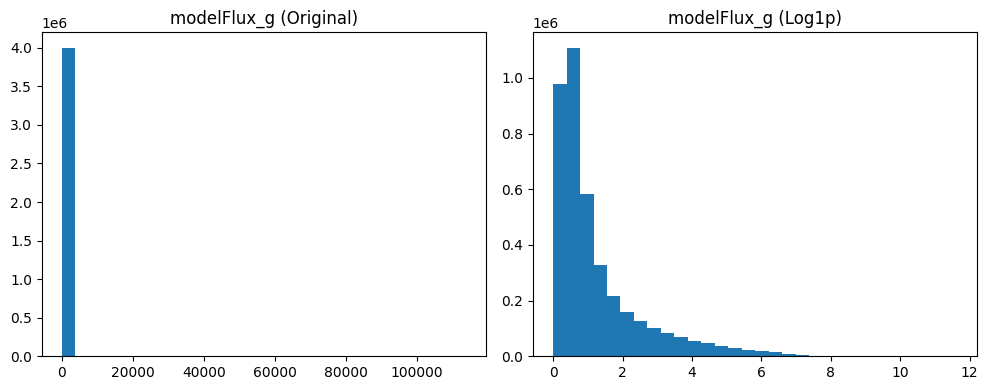

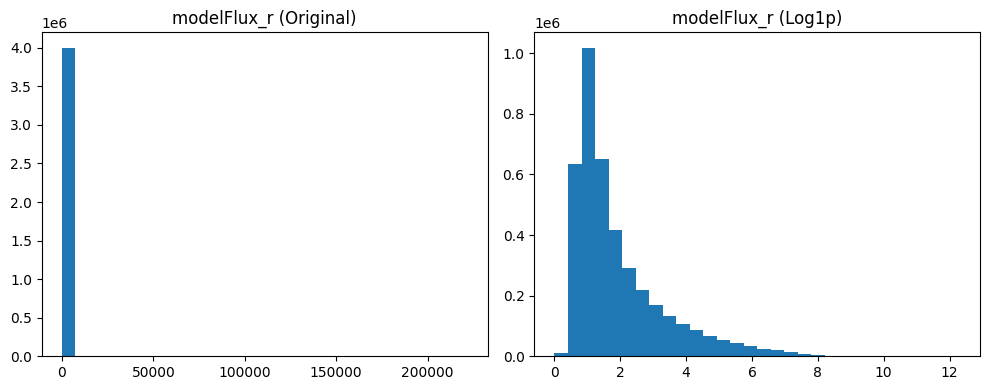

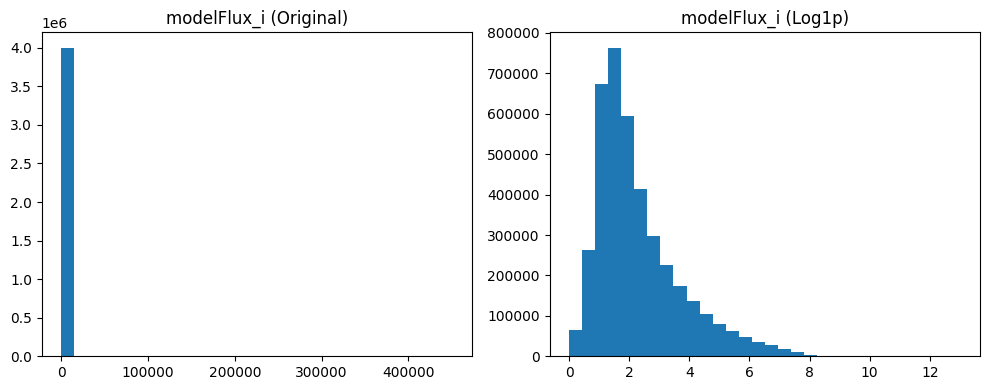

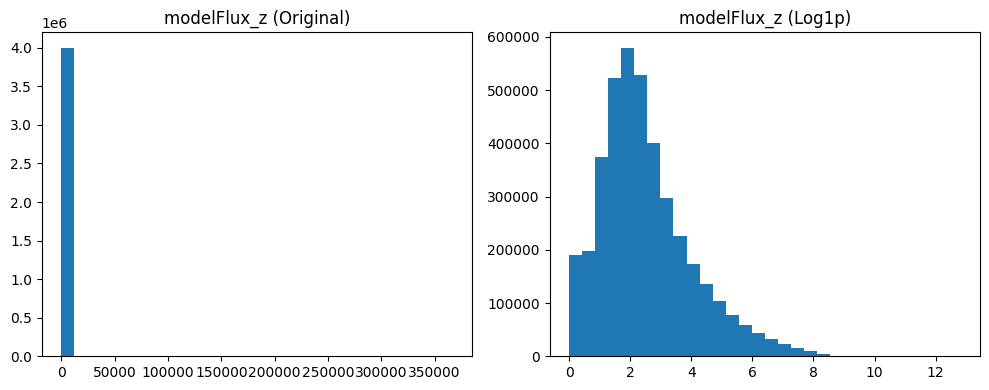

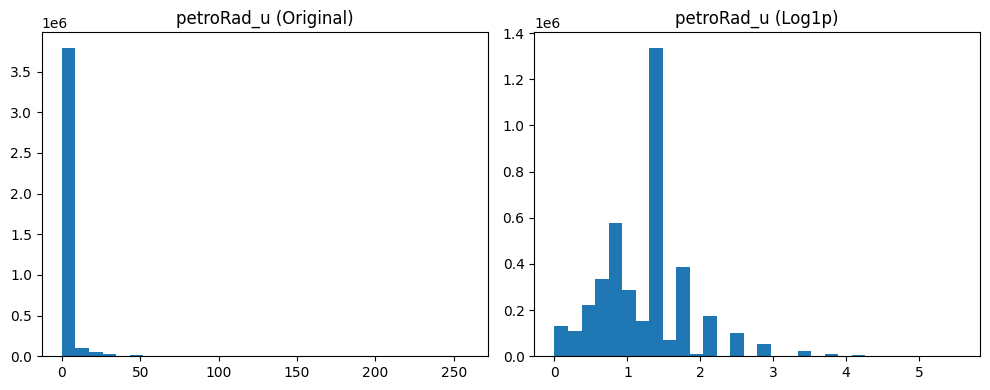

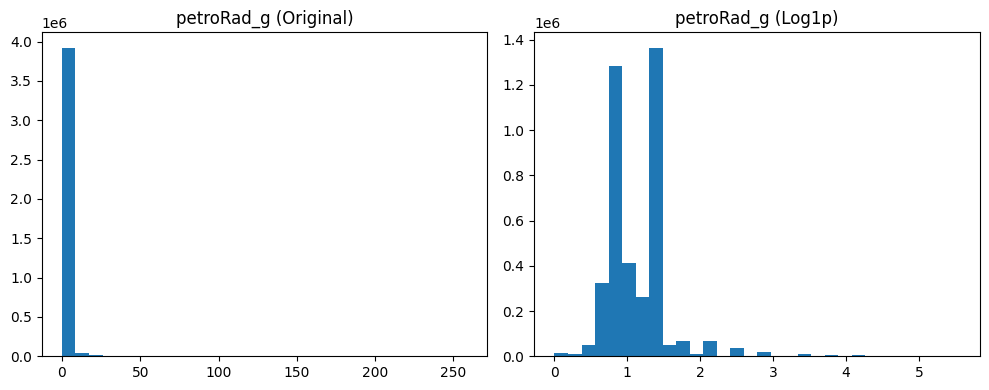

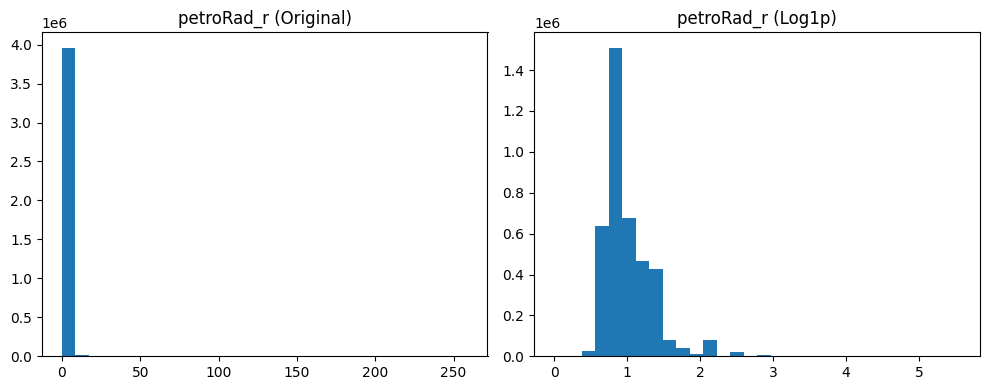

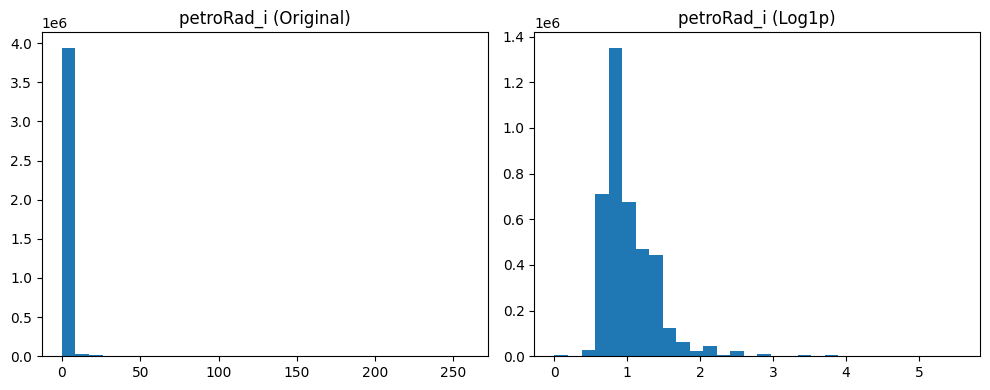

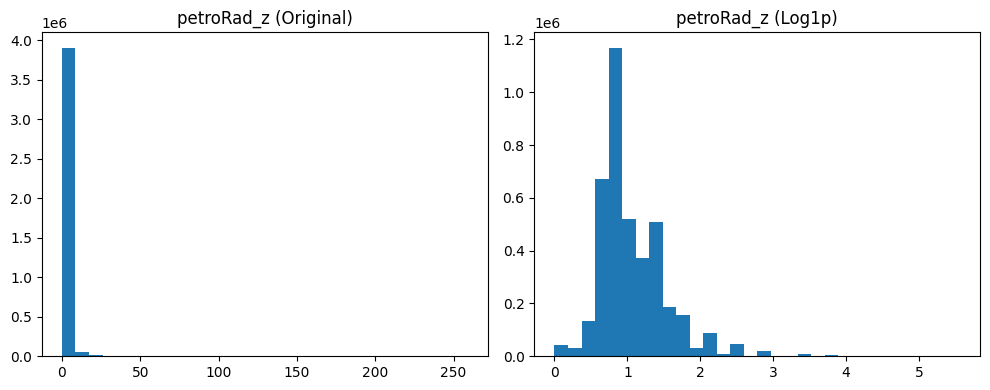

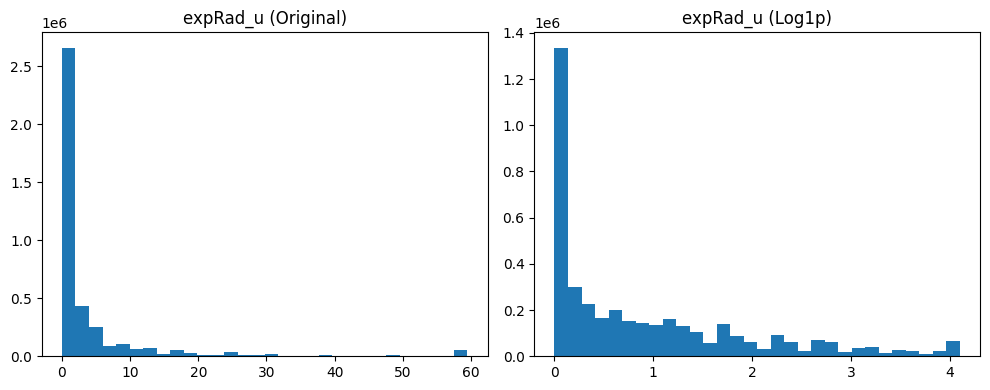

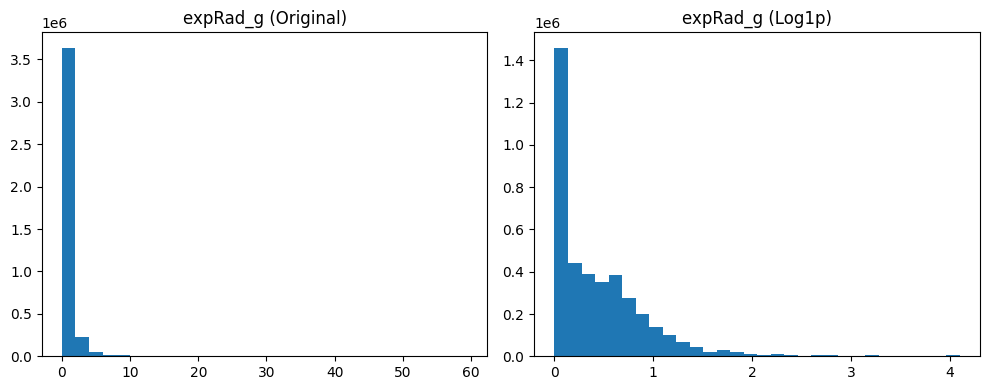

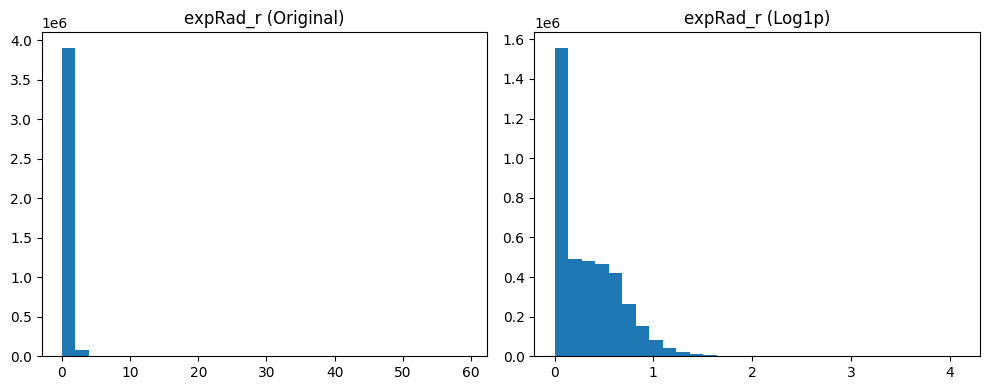

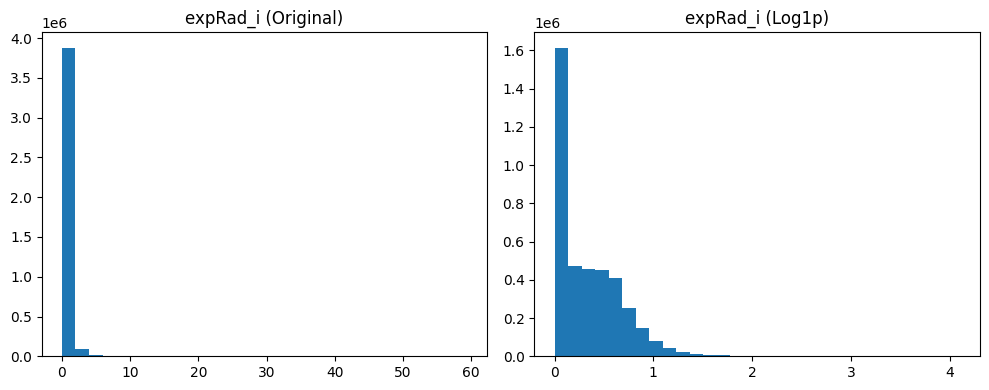

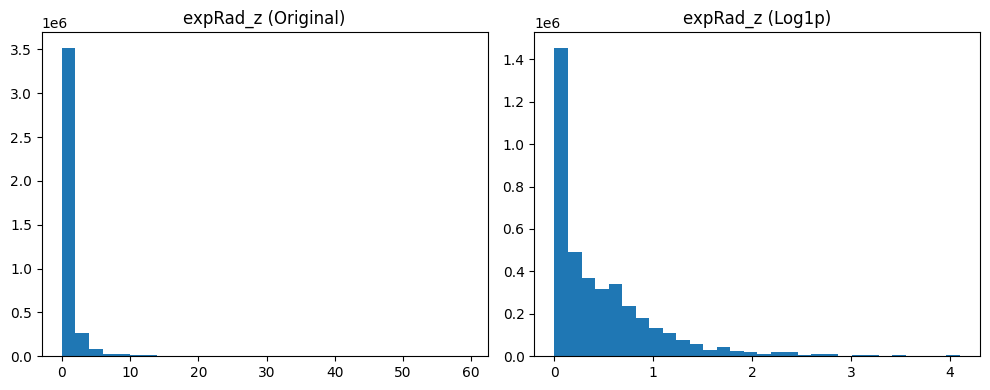

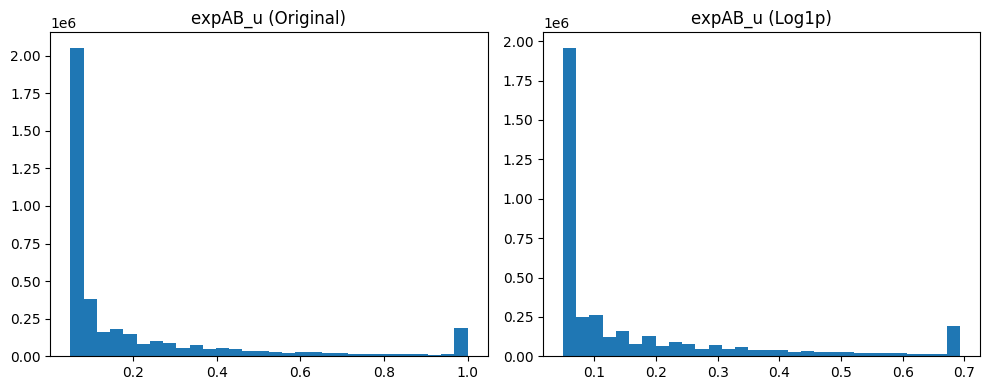

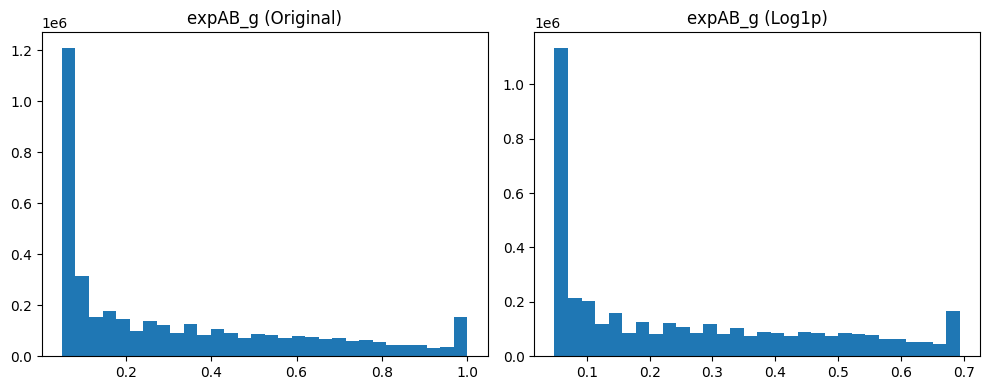

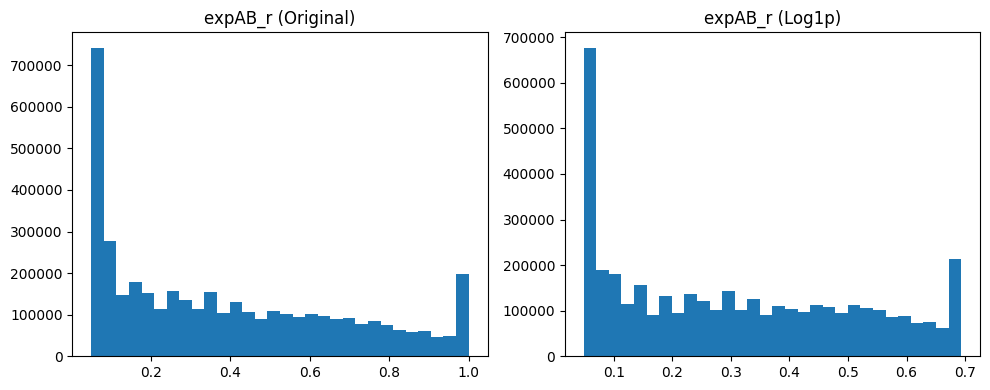

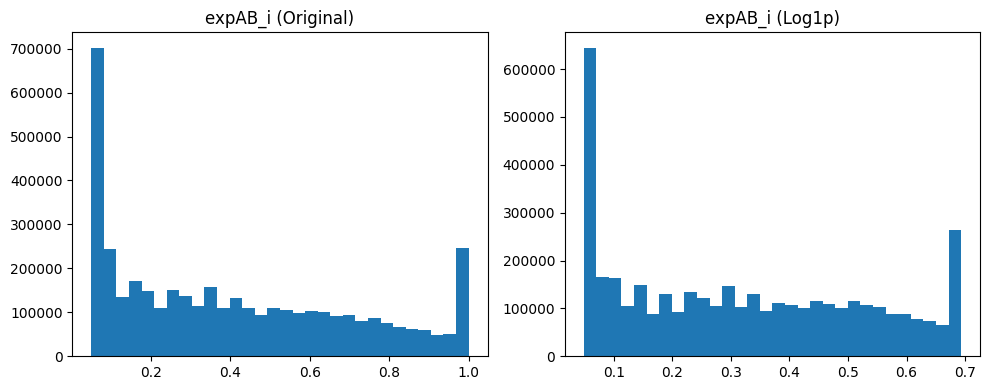

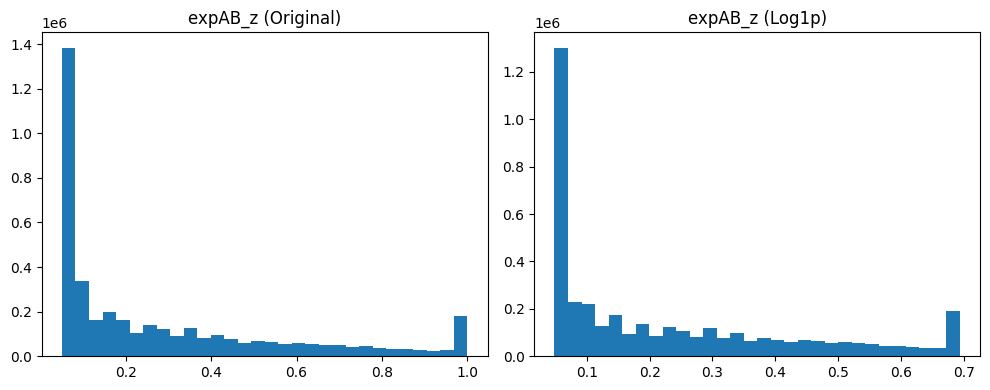

In [16]:
# Histograma de las variables numéricas con logaritmico (selected_columns)
# Mostrar 5 histogramas por figura de las columnas transformadas
for col in selected_columns:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        df[col] = df[col].clip(lower=1e-9)
        original = df[col]  # para simular el valor original
        axes[0].hist(original.dropna(), bins=30)
        axes[0].set_title(f"{col} (Original)")
        axes[1].hist(np.log1p(df[col]).dropna(), bins=30)
        axes[1].set_title(f"{col} (Log1p)")
        plt.tight_layout()
        plt.show()

In [17]:
#Estadísticas básicas para numericas
df.describe(include="number")

,objID,run,camcol,field,rowv,colv,u,g,r,i,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,q_u,q_g,q_r,q_i,q_z,u_u,u_g,u_r,u_i,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,1.237648e+18,5.659329e+02,3.491990e+00,3.539839e+02,-1.229906e+00,-1.229669e+00,2.326655e+01,2.196408e+01,2.075499e+01,2.026221e+01,1.993484e+01,2.331607e+01,2.217918e+01,2.103692e+01,2.051476e+01,2.013707e+01,4.901446e+00,1.938038e+01,3.801622e+01,5.019663e+01,6.675912e+01,3.595975e+00,2.660009e+00,2.153877e+00,2.268903e+00,2.464867e+00,4.273615e+00,1.006876e+00,5.685698e-01,5.741834e-01,1.221625e+00,-1.100517e+01,2.634738e+00,-4.317365e-02,-8.278062e-02,-5.412322e-02,-6.096688e+00,-4.962920e-01,3.233861e-03,-2.155812e-02,1.581106e-02,2.020452e-01,3.187758e-01,3.895273e-01,4.070051e-01,2.846370e-01,1.465570e+02,1.294996e+00,1.666282e+01,2.041597e+02
std,1.157163e+12,2.694373e+02,1.640876e+00,2.108861e+02,1.108875e+02,1.108875e+02,1.806353e+00,1.951670e+00,1.704858e+00,1.741248e+00,1.773982e+00,1.701665e+00,1.963581e+00,1.778409e+00,1.796574e+00,1.788885e+00,5.279018e+01,1.471460e+02,2.495028e+02,3.882393e+02,5.558143e+02,8.672096e+00,6.359679e+00,6.189141e+00,6.139913e+00,5.259957e+00,9.933262e+00,3.435199e+00,2.114138e+00,2.000210e+00,3.971844e+00,2.123614e+04,4.749545e+03,1.116917e+01,6.345815e+01,2.307531e+02,1.047518e+04,7.846133e+02,2.090980e+01,6.493048e+01,1.878144e+02,2.541024e-01,2.890191e-01,2.956003e-01,3.006857e-01,2.814496e-01,6.975852e+01,7.117185e+00,3.360723e+01,9.805877e+01
min,1.237646e+18,9.400000e+01,1.000000e+00,1.100000e+01,-9.999000e+03,-9.999000e+03,1.036910e+01,9.859290e+00,9.135631e+00,8.364407e+00,8.588462e+00,1.009845e+01,9.797405e+00,9.360425e+00,8.120246e+00,8.507508e+00,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,5.027098e-05,1.145184e-05,1.519508e-03,4.915121e-06,1.394985e-05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,-4.237508e+07,-9.305439e+04,-1.727213e+04,-8.447918e+04,-2.944563e+05,-2.082001e+07,-1.546441e+06,-1.088700e+03,-1.090781e+05,-2.253042e+05,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.052647e+00,-9.043676e+00,-6.459335e+01,1.656026e-04
25%,1.237647e+18,3.070000e+02,2.000000e+00,1.650000e+02,-4.691689e-03,-4.336495e-03,2.246006e+01,2.106500e+01,1.996472e+01,1.939146e+01,1.899236e+01,2.276329e+01,2.136565e+01,2.026023e+01,1.963975e+01,1.921553e+01,3.395509e-02,4.840835e-01,1.583576e+00,2.671750e+00,3.410678e+00,1.264846e+00,1.277374e+00,1.170163e+00,1.153408e+00,1.131841e+00,3.788431e-02,3.098091e-02,2.393320e-02,2.172199e-02,3.743826e-02,-3.300615e-01,-1.082668e-01,-9.657131e-02,-1.173684e-01,-1.847010e-01,-3.301269e-01,-6.161623e-02,-5.767423e-02,-5.832260e-02,-8.673370e-02,5.000000e-02,5.766463e-02,1.089202e-01,1.265294e-01,5.000000e-02,9.472061e+01,-5.084042e-01,-7.375052e+00,1.957083e+02
50%,1.237649e+18,7.520000e+02,4.000000e+00,3.790000e+02,0.000000e+00,0.000000e+00,2.355378e+01,2.240022e+01,2.125834e+01,2.062551e+01,2.018735e+01,2.364109e+01,2.271662e+01,2.162635e+01,2.095734e+01,2.046863e+01,3.271371e-01,1.088862e+00,3.133487e+00,5.615025e+00,8.350072e+00,2.968987e+00,1.882135e+00,1.437642e+00,1.471452e+00,1.491077e+00,6.658391

In [18]:
# Análisis de Correlación (heatmap)
#Permite entender la relación entre las características de entrada y tu variable objetivo (el tipo de objeto celeste),.
#También ayuda a identificar características altamente correlacionadas entre sí (multicolinealidad), donde podrías considerar eliminar una de ellas si no aportan información única
#convertirtype a numeric para ver tambien su correlacion
# Algunos son ids y los podemos quitar
#  ej: objID, run, camcol

# df['type_numeric'] = df['type'].astype('category').cat.codes
df['type_numeric'] = df['type'].map({'star': 0, 'galaxy': 1})

# 1. Calcular matriz de correlación
# Eliminar objID, run, camcol, field ya que son identificadores, quitamos q_u, q_*, u_* ya que casi todos los valores estan sesgados a 0
df.drop(columns=['objID', 'rowv', 'colv','run', 'camcol', 'field', 'q_u', 'q_g', 'q_r', 'q_i', 'q_z', 'u_u', 'u_g', 'u_r', 'u_i', 'u_z'], inplace=True)
corr_matrix = df.select_dtypes(include='number').corr()
display(corr_matrix)

,u,g,r,i,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l,type_numeric
u,1.000000,0.828679,0.784362,0.688790,0.631015,0.971122,0.814176,0.752656,0.669205,0.619704,-0.279718,-0.371974,-0.389279,-0.299468,-0.266056,0.001054,0.043306,-0.022789,0.011787,0.013553,0.147743,0.081138,-0.011568,0.022955,0.059373,-0.238336,-0.488998,-0.365350,-0.288460,-0.333861,0.024783,-0.005103,0.032302,0.009229,0.170518
g,0.828679,1.000000,0.939078,0.874866,0.819190,0.846201,0.976593,0.919711,0.855881,0.807581,-0.256576,-0.367550,-0.389604,-0.310644,-0.279796,0.019460,0.067158,0.024457,0.028228,0.040483,0.158801,0.144145,0.059103,0.071490,0.120139,-0.289284,-0.557878,-0.454504,-0.372887,-0.425565,0.063726,-0.007673,0.093169,0.040950,0.295265
r,0.784362,0.939078,1.000000,0.934055,0.893478,0.803997,0.939229,0.971267,0.927024,0.893386,-0.264555,-0.376781,-0.418284,-0.331583,-0.305487,-0.000267,0.055302,-0.057338,0.015976,0.034054,0.136151,0.103491,-0.027199,0.060494,0.141524,-0.301771,-0.540832,-0.469343,-0.404693,-0.468279,0.087368,-0.078813,0.152860,0.066859,0.332075
i,0.688790,0.874866,0.934055,1.000000,0.939957,0.715913,0.877168,0.931133,0.966657,0.928331,-0.234035,-0.341221,-0.375390,-0.317630,-0.285340,0.021613,0.077832,0.047591,0.030563,0.060354,0.143214,0.131114,0.108119,0.117416,0.189017,-0.277824,-0.493879,-0.449662,-0.426399,-0.474872,0.120976,-0.017087,0.176265,0.078092,0.386010
z,0.631015,0.819190,0.893478,0.939957,1.000000,0.660891,0.826458,0.897292,0.931413,0.970651,-0.225417,-0.330946,-0.367648,-0.303777,-0.290107,0.018925,0.072854,0.050252,0.041048,0.054087,0.133366,0.121888,0.114264,0.121594,0.215709,-0.267291,-0.458406,-0.424627,-0.409564,-0.476759,0.126059,-0.019863,0.185624,0.083718,0.405241
psfMag_u,0.971122,0.846201,0.803997,0.715913,0.660891,1.000000,0.856253,0.803151,0.721546,0.671694,-0.291961,-0.395407,-0.412321,-0.318121,-0.281550,0.037425,0.066765,0.025733,0.031600,0.041846,0.193839,0.114159,0.061347,0.064010,0.087750,-0.254285,-0.483279,-0.355860,-0.283995,-0.335649,0.030793,0.005002,0.048700,0.025102,0.249545
psfMag_g,0.814176,0.976593,0.939229,0.877168,0.826458,0.856253,1.000000,0.956683,0.897579,0.849774,-0.262360,-0.375750,-0.401465,-0.318492,-0.287543,0.038685,0.099891,0.040479,0.048691,0.069509,0.187599,0.197255,0.103381,0.115031,0.153337,-0.288083,-0.536303,-0.431542,-0.358446,-0.418679,0.068311,-0.010267,0.115853,0.062230,0.401883
psfMag_r,0.752656,0.919711,0.971267,0.931133,0.897292,0.803151,0.956683,1.000000,0.962664,0.929111,-0.261090,-0.376396,-0.414573,-0.330929,-0.303902,0.038304,0.094971,0.037466,0.049130,0.077043,0.181144,0.165197,0.116041,0.127530,0.185779,-0.290639,-0.512878,-0.434585,-0.382985,-0.452849,0.099027,-0.048251,0.173369,0.088247,0.466703
psfMag_i,0.669205,0.855881,0.927024,0.966657,0.931413,0.721546,0.897579,0.962664,1.000000,0.963464,-0.241350,-0.349108,-0.387380,-0.320935,-0.292665,0.037258,0.096744,0.040924,0.061342,0.087813,0.171372,0.164902,0.122877,0.181943,0.221085,-0.274249,-0.469451,-0.417592,-0.399803,-0.460956,0.123404,-0.017979,0.197538,0.100466,0.507246
psfMag_z,0.619704,0.807581,0.893386,0.928331,0.970651,0.671694,0.849774,0.929111,0.963464,1.000000,-0.232385,-0.339776,-0.380259,-0.311133,-0.294863,0.033114,0.090454,0.041561,0.059096,0.090882,0.157701,0.150720,0.116400,0.156085,0.253892,-0.265549,-0.438775,-0.397236,-0.387391,-0.461073,0.128610,-0.021597,0.205522,0.103375,0.511002


In [19]:
#Estadísticas básicas para numericas
df.describe(include="number")

,u,g,r,i,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l,type_numeric
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.326655e+01,2.196408e+01,2.075499e+01,2.026221e+01,1.993484e+01,2.331607e+01,2.217918e+01,2.103692e+01,2.051476e+01,2.013707e+01,4.901446e+00,1.938038e+01,3.801622e+01,5.019663e+01,6.675912e+01,3.595975e+00,2.660009e+00,2.153877e+00,2.268903e+00,2.464867e+00,4.273615e+00,1.006876e+00,5.685698e-01,5.741834e-01,1.221625e+00,2.020452e-01,3.187758e-01,3.895273e-01,4.070051e-01,2.846370e-01,1.465570e+02,1.294996e+00,1.666282e+01,2.041597e+02,4.999990e-01
std,1.806353e+00,1.951670e+00,1.704858e+00,1.741248e+00,1.773982e+00,1.701665e+00,1.963581e+00,1.778409e+00,1.796574e+00,1.788885e+00,5.279018e+01,1.471460e+02,2.495028e+02,3.882393e+02,5.558143e+02,8.672096e+00,6.359679e+00,6.189141e+00,6.139913e+00,5.259957e+00,9.933262e+00,3.435199e+00,2.114138e+00,2.000210e+00,3.971844e+00,2.541024e-01,2.890191e-01,2.956003e-01,3.006857e-01,2.814496e-01,6.975852e+01,7.117185e+00,3.360723e+01,9.805877e+01,5.000001e-01
min,1.036910e+01,9.859290e+00,9.135631e+00,8.364407e+00,8.588462e+00,1.009845e+01,9.797405e+00,9.360425e+00,8.120246e+00,8.507508e+00,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,5.027098e-05,1.145184e-05,1.519508e-03,4.915121e-06,1.394985e-05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.052647e+00,-9.043676e+00,-6.459335e+01,1.656026e-04,0.000000e+00
25%,2.246006e+01,2.106500e+01,1.996472e+01,1.939146e+01,1.899236e+01,2.276329e+01,2.136565e+01,2.026023e+01,1.963975e+01,1.921553e+01,3.395509e-02,4.840835e-01,1.583576e+00,2.671750e+00,3.410678e+00,1.264846e+00,1.277374e+00,1.170163e+00,1.153408e+00,1.131841e+00,3.788431e-02,3.098091e-02,2.393320e-02,2.172199e-02,3.743826e-02,5.000000e-02,5.766463e-02,1.089202e-01,1.265294e-01,5.000000e-02,9.472061e+01,-5.084042e-01,-7.375052e+00,1.957083e+02,0.000000e+00
50%,2.355378e+01,2.240022e+01,2.125834e+01,2.062551e+01,2.018735e+01,2.364109e+01,2.271662e+01,2.162635e+01,2.095734e+01,2.046863e+01,3.271371e-01,1.088862e+00,3.133487e+00,5.615025e+00,8.350072e+00,2.968987e+00,1.882135e+00,1.437642e+00,1.471452e+00,1.491077e+00,6.658391e-01,3.784374e-01,3.040983e-01,2.764382e-01,3.434033e-01,7.666935e-02,2.071002e-01,3.302743e-01,3.500178e-01,1.552323e-01,1.213573e+02,1.047863e-01,1.492706e+01,2.117058e+02,0.000000e+00
75%,2.450333e+01,2.325198e+01,2.199472e+01,2.142812e+01,2.112006e+01,2.442004e+01,2.348691e+01,2.234503e+01,2.175369e+01,2.140710e+01,1.018575e+00,3.747562e+00,1.032888e+01,1.751344e+01,2.527452e+01,2.970132e+00,2.969479e+00,2.195777e+00,2.280461e+00,2.806242e+00,3.305873e+00,9.647432e-01,7.324229e-01,7.322454e-01,1.013915e+00,2.360698e-01,5.170471e-01,6.174082e-01,6.417696e-01,4.268602e-01,2.110722e+02,7.513936e-01,4.847013e+01,2.560645e+02,1.000000e+00
max,3.360400e+01,3.745042e+01,3.154985e+01,3.482836e+01,3.673254e+01,3.346148e+01,3.398379e+01,3.156431e+01,2.985157e+01,3.134287e+01,7.118052e+04,1.138372e+05,2.216909e+05,4.510631e+05,3.669570e+05,2.586432e+02,2.589053e+02,2.586953e+02,2.588486e+02,2.587086e+02,5.944693e+01,5.946589e+01,5.943966e+01,5.940900e+01,5.941837e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.596718e+02,7.511553e+01,6.413183e+01,3.600000e+02,1.000000e+00


In [20]:
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows

# Crear archivo Excel
wb = Workbook()

### HOJA 1: Mapa de calor de correlación
ws1 = wb.active
ws1.title = "Matriz Correlación"

for r_idx, row in enumerate(dataframe_to_rows(corr_matrix, index=True, header=True), 1):
    ws1.append(row)
    if r_idx == 1:
        continue
    for c_idx, value in enumerate(row[1:], 2):
        try:
            value = float(value)
            scale = int((value + 1) / 2 * 255)
            red = scale if value > 0 else 255
            blue = scale if value < 0 else 255
            hex_color = f"{red:02X}FF{blue:02X}"
            fill = PatternFill(start_color=hex_color, end_color=hex_color, fill_type="solid")
            ws1.cell(row=r_idx, column=c_idx).fill = fill
        except:
            pass

### HOJA 2: Correlaciones con type_numeric
target_corr = corr_matrix['type_numeric'].drop('type_numeric')
target_corr = target_corr.sort_values(key=abs, ascending=False)

ws2 = wb.create_sheet(title="Con type_numeric")
ws2.append(["Variable", "Correlación con type_numeric"])

for var, corr in target_corr.items():
    ws2.append([var, corr])
    try:
        scale = int((corr + 1) / 2 * 255)
        red = scale if corr > 0 else 255
        blue = scale if corr < 0 else 255
        hex_color = f"{red:02X}FF{blue:02X}"
        fill = PatternFill(start_color=hex_color, end_color=hex_color, fill_type="solid")
        ws2.cell(row=ws2.max_row, column=2).fill = fill
    except:
        pass

# Guardar el archivo
wb.save("matriz_correlacion_heatmap.xlsx")
print("✅ Archivo guardado como 'matriz_correlacion_heatmap.xlsx' con dos hojas.")

✅ Archivo guardado como 'matriz_correlacion_heatmap.xlsx' con dos hojas.


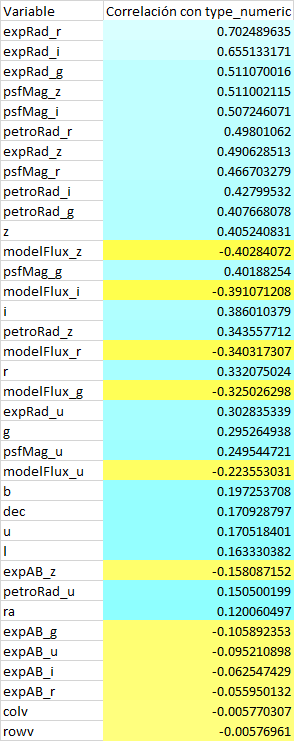

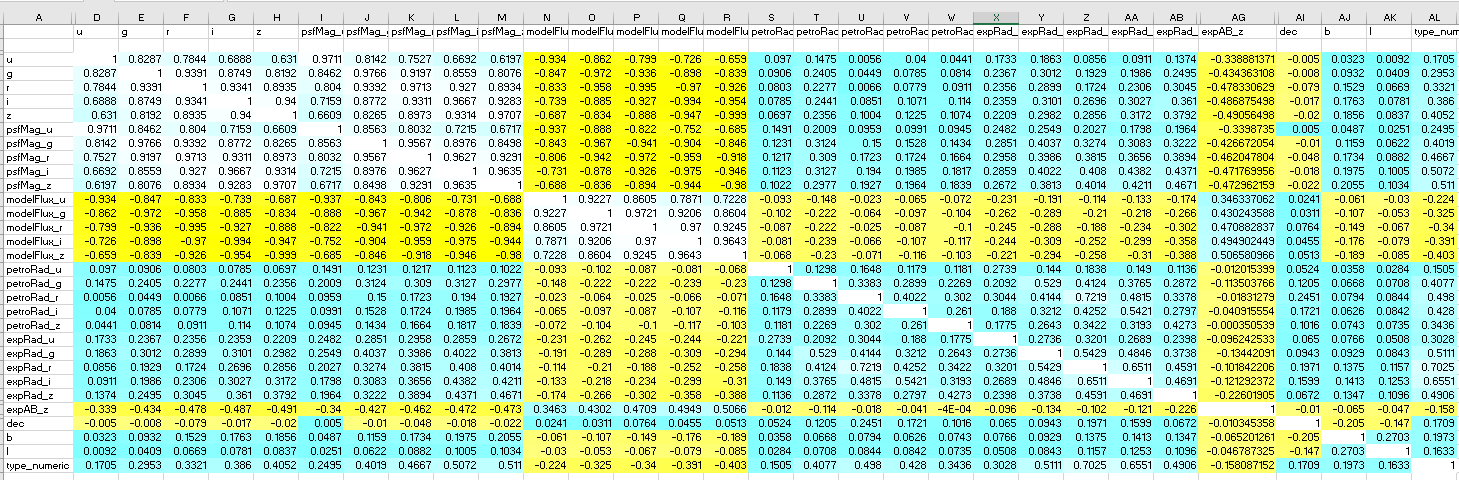

In [21]:
# eliminar variables con mas de 0.9 de correlacion entre si, seleccionar las que tengan mas correlacion con el target:

## Preparacion de datos

In [22]:
# Feature selection

In [23]:
features = [
    'expRad_r', 'expRad_i', 'expRad_g',
    'petroRad_r', 'expRad_z', 'petroRad_i',
    'petroRad_g', 'i', 'petroRad_z', 'expRad_u', 'z', 'r','g'
]


## PIPELINE MODULAR

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import FunctionTransformer

df_sampled = df.groupby("type_numeric").sample(n=50_000, random_state=42)
X = df_sampled[features]
y = df_sampled['type_numeric']


# Columnas que no llevan logaritmo
selected_columns = [col for col in selected_columns if col in X.columns]
remaining_columns = [col for col in features if col not in selected_columns]

#  Pipeline para columnas con log
log_transformer = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()) #RobustScaler ya que maneja mejor los valores atipicos necesarios (cambiar? StandardScaler)
])


# Pipeline para columnas normales
standard_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", RobustScaler())  #RobustScaler ya que maneja mejor los valores atipicos necesarios (cambiar? StandardScaler)
])


# 6. ColumnTransformer final
preprocessing_pipeline = ColumnTransformer([
    ("log_cols", log_transformer, selected_columns),
    ("other_cols", standard_transformer, remaining_columns)
])

# preprocessor = ColumnTransformer([
#     ("num", numerical_pipeline, X.columns)
# ])


preprocessing_pipeline

,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False


In [25]:

from sklearn.metrics import make_scorer, recall_score

models = {
    "Random Forest": RandomForestClassifier(
    random_state=42,     
    max_depth=10,  # o probar con valores como 15, 20 ya que err training es 0.0000
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=4),
    "Logistic Regression": LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}
# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Mantiene la proporción original de las clases en cada fold.
# División de los datos para error de entrenamiento
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
# Resultados
results = []

for name, model in models.items():
    print(f"\n🔄 Evaluando modelo: {name}")

    pipeline = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("classifier", model)
    ])

    display(pipeline)

    # Entrenamiento para medir error de entrenamiento
    pipeline.fit(X_train_small, y_train_small)
    y_train_pred = pipeline.predict(X_train_small)
    err_train = 1 - accuracy_score(y_train_small, y_train_pred)

    # Validación cruzada con métricas seleccionadas
    scores = cross_validate(
        pipeline,
        X, y,
        cv=kf,
        scoring={
            "accuracy": "accuracy",
            "f1_macro": make_scorer(f1_score, average="macro"),
            "recall_macro": make_scorer(recall_score, average="macro")
        },
        return_train_score=False,
        n_jobs=-1,
        verbose=1
    )

    results.append({
        "Modelo": name,
        "Err training": round(err_train, 4),
        "Err cross validation": round(1 - scores["test_accuracy"].mean(), 4),
        "Accuracy (CV)": round(scores["test_accuracy"].mean(), 4),
        "F1 Macro (CV)": round(scores["test_f1_macro"].mean(), 4),
        "Recall (CV)": round(scores["test_recall_macro"].mean(), 4),
    })

df_resultados = pd.DataFrame(results)
print("\n✅ Resultados comparativos:")
print(df_resultados)



🔄 Evaluando modelo: Random Forest


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



🔄 Evaluando modelo: Logistic Regression


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



🔄 Evaluando modelo: SVM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



🔄 Evaluando modelo: KNN


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



✅ Resultados comparativos:
                Modelo  Err training  Err cross validation  Accuracy (CV)  \
0        Random Forest        0.0313                0.0437         0.9564   
1  Logistic Regression        0.0572                0.0570         0.9430   
2                  SVM        0.0425                0.0455         0.9545   
3                  KNN        0.0415                0.0575         0.9425   

   F1 Macro (CV)  Recall (CV)  
0         0.9563       0.9564  
1         0.9430       0.9430  
2         0.9545       0.9545  
3         0.9425       0.9425  


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished


In [26]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
import numpy as np

# Definimos el pipeline para Logistic Regression
pipeline_lr = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", LogisticRegression(solver="saga", max_iter=1000, random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_distributions = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': uniform(0.001, 10),
    'classifier__l1_ratio': uniform(0, 1)  # solo aplica para elasticnet, pero no falla si se ignora
}

# Búsqueda aleatoria
search = RandomizedSearchCV(
    estimator=pipeline_lr,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Subset de entrenamiento (100,000 muestras)
X_small = X.sample(n=100000, random_state=42)
y_small = y.loc[X_small.index]

# Entrenar la búsqueda
search.fit(X_small, y_small)

# Mostrar resultados
print("✅ Mejor combinación de hiperparámetros:")
print(search.best_params_)

print("\n🔍 Mejor puntuación (accuracy):", round(search.best_score_, 4))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\jpdealba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


✅ Mejor combinación de hiperparámetros:
{'classifier__C': np.float64(0.46550412719997725), 'classifier__l1_ratio': np.float64(0.6075448519014384), 'classifier__penalty': 'l1'}

🔍 Mejor puntuación (accuracy): 0.9429


# MODELO FINAL

In [27]:
from sklearn.linear_model import LogisticRegression


X = df[features]
y = df['type_numeric']

# Mejor modelo basado en RandomizedSearchCV
mejor_modelo = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", LogisticRegression(
        solver="saga",
        max_iter=1000,
        random_state=42,
        penalty="l1",
        C=0.46550412719997725,
        l1_ratio=0.6075448519014384
    ))
])

# Entrenamos con TODOS los datos disponibles
mejor_modelo.fit(X, y)


c:\Users\jpdealba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_cols', ...), ('other_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Probar con test.csv

In [28]:

# Set the path to the file you'd like to load
# Download latest version
'''
path = "test.csv"

# Load the latest version
df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "hari31416/celestialclassify",
  path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records:", df_test.head())
'''

'\npath = "test.csv"\n\n# Load the latest version\ndf_test = kagglehub.load_dataset(\n  KaggleDatasetAdapter.PANDAS,\n  "hari31416/celestialclassify",\n  path,\n  # Provide any additional arguments like\n  # sql_query or pandas_kwargs. See the\n  # documenation for more information:\n  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas\n)\n\n\nprint("First 5 records:", df_test.head())\n'

In [30]:
df_test = pd.read_csv("test.csv")

In [31]:
X_test_final = df_test[features]

In [3]:
y_pred = mejor_modelo.predict(X_test_final)
# 0 → STAR, 1 → GALAXY
# 0 → STAR, 1 → GALAXY
label_map = {0: "STAR", 1: "GALAXY", 'star': "STAR", 'galaxy': "GALAXY"}

# Mapear predicciones a etiquetas
y_pred_labels = pd.Series(y_pred).map(label_map)

# Mapear también el valor original si viene como número
type_labels = df_test["type"].map(label_map)

# Crear DataFrame final
resultado = pd.DataFrame({
    "type": type_labels,
    "prediction": y_pred_labels
})

# Guardar CSV
resultado.to_csv("predicciones.csv", index=False)


NameError: name 'mejor_modelo' is not defined

In [33]:
from sklearn.metrics import accuracy_score

# Compara las etiquetas reales vs. predichas (ambas en formato texto: "STAR", "GALAXY")
accuracy = accuracy_score(resultado["type"], resultado["prediction"])

# Muestra el porcentaje
print(f"✅ Porcentaje correcto: {accuracy * 100:.2f}%")

✅ Porcentaje correcto: 94.24%


In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear matriz de confusión
cm = confusion_matrix(resultado["type"], resultado["prediction"], labels=["STAR", "GALAXY"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["STAR", "GALAXY"])

# Plotear sin notación científica
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='viridis', colorbar=True)

# Desactivar notación científica
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# También puedes quitar notación de colorbar
disp.im_.colorbar.formatter.set_powerlimits((0, 0))
disp.im_.colorbar.update_ticks()

plt.title("Matriz de Confusión sin notación científica")
plt.tight_layout()
plt.show()


NameError: name 'resultado' is not defined

In [ ]:
# Display classification report
#print(classification_report(y_val, y_val_pred_classes, target_names=['Star', 'Galaxy']))

X_test_final = df_test[features]



In [ ]:
X_test_final

In [ ]:
y_pred = mejor_modelo.predict(X_test_final)
# 0 → STAR, 1 → GALAXY
# 0 → STAR, 1 → GALAXY
label_map = {0: "STAR", 1: "GALAXY", 'star': "STAR", 'galaxy': "GALAXY"}

# Mapear predicciones a etiquetas
y_pred_labels = pd.Series(y_pred).map(label_map)

# Mapear también el valor original si viene como número
type_labels = df_test["type"].map(label_map)

# Crear DataFrame final
resultado = pd.DataFrame({
    "type": type_labels,
    "prediction": y_pred_labels
})

# Guardar CSV
resultado.to_csv("predicciones.csv", index=False)


In [ ]:
from sklearn.metrics import accuracy_score

# Compara las etiquetas reales vs. predichas (ambas en formato texto: "STAR", "GALAXY")
accuracy = accuracy_score(resultado["type"], resultado["prediction"])

# Muestra el porcentaje
print(f"✅ Porcentaje correcto: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear matriz de confusión
cm = confusion_matrix(resultado["type"], resultado["prediction"], labels=["STAR", "GALAXY"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["STAR", "GALAXY"])

# Plotear sin notación científica
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='viridis', colorbar=True)

# Desactivar notación científica
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# También puedes quitar notación de colorbar
disp.im_.colorbar.formatter.set_powerlimits((0, 0))
disp.im_.colorbar.update_ticks()

plt.title("Matriz de Confusión sin notación científica")
plt.tight_layout()
plt.show()
